# Оптимизация бизнес-решений при управлении персоналом компании "Работа с заботой"

**Описание проекта**: HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. Процесс принятия бизнес-решений следует оптимизировать при помощи машинного обучения.

**Цель исследования**: Разработать техническое решение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
- *Задача 1.* Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
- *Задача 2.* Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

**Ход исследования:**

***Задача 1.*** 
- *Шаг 1.* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
- *Шаг 2.* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- *Шаг 3.* Исследовательский анализ данных.
- *Шаг 4.* Подготовка данных в пайплайне.
- *Шаг 5.* Обучение и анализ моделей.
- *Шаг 6.* Выводы.

***Задача 2.*** 
- *Шаг 1.* Подготовка данных: загрузка и изучение общей информации из предоставленного датасета.
- *Шаг 2.* Предобработка данных: обработка пропущенных значений, корректировка типа данных, дубликатов и других аномалий.
- *Шаг 3.* Исследовательский анализ данных.
- *Шаг 4.* Добавление нового входного признака.
- *Шаг 5.* Подготовка данных в пайплайне.
- *Шаг 6.* Обучение и анализ моделей.
- *Шаг 7.* Выводы.

**Общий вывод**: По итогам проведенного анализа и разработки моделей машинного обучения появится возможность предсказать уровень удовлетворённости сотрудника и вероятность его увольнения из компании, что снизит потенциальные риски. Это важно для бизнеса, так как удовлетворённость работой напрямую влияет на отток сотрудников. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

**Описание данных**

Заказчик предоставил данные со следующими признаками:
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак (от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён).



In [1]:
# Установим библиотеки, которые понадобятся для работы над проектом. 

!pip install -q phik
!pip install -q shap

# Переустанавливаем версию matplotlib для визуализации SHAP
!pip install -q matplotlib==3.5.1

# Обновляем scikit-learn, так как выдавал ошибки при запуске кода из теории
!pip install -Uq scikit-learn

In [2]:
# Импортируем библиотеки, которые понадобятся для работы над проектом. 
import time

# для датафрейма 
import pandas as pd
import numpy as np

# для визуализации 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

# для статистики
import phik
from phik import report
from phik.report import plot_correlation_matrix
from scipy import stats as st

# для машинного обучения
import shap
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier

# модели 
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

# метрики
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer


In [3]:
# Проверим версию matplotlib

print(matplotlib.__version__)

3.5.1


In [4]:
# Зафисируем константы

RANDOM_STATE = 42


# Первая задача 

Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика.

##  Загрузка данных

In [6]:
# Считаем данные из csv-файлов в датафрейм и сохраним в переменные. 

try:
    train_js = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
except:
    train_js = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
    
try:
    X_test_js = pd.read_csv('/datasets/test_features.csv')
except:
    X_test_js = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    
try:
    y_test_js = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
except:
    y_test_js = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
    

In [7]:
# Выведем основную информацию о датафрейме train_js

main_info(train_js)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,4000.0,544957.621000,257883.104622,100954.00,322836.75,534082.50,771446.00,999521.0
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0




Первые строки:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


**Комментарии**

Датасет из файла `train_job_satisfaction_rate.csv` мы сохранили в переменную `train_js`. Он содержит 4000 строк, есть несколько пропусков в столбцах `dept` и `level`. На первый взгляд типы данных распределены корректно, названия столбцов соответствуют правилам snake_case, статистические показатели выглядят правдоподобно. 
 


In [8]:
# Выведем основную информацию о датафрейме X_test_js

main_info(X_test_js)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0




Первые строки:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


**Комментарии**

Датасет из файла `test_features.csv` мы сохранили в переменную `X_test_js`. Он содержит 2000 строк, есть несколько пропусков также в столбцах `dept` и `level`. Типы данных распределены корректно, названия столбцов соответствуют правилам snake_case, статистические показатели схожи с тренировочной выборкой, значит данные подойдут для тестирования.  


In [9]:
# Выведем основную информацию о датафрейме y_test_js

main_info(y_test_js)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.21350,253851.326129,100298.00,339052.00,550793.00,765763.75,999029.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0




Первые строки:


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


**Комментарии**

Датасет из файла `test_target_job_satisfaction_rate.csv` мы сохранили в переменную `y_test_js`. Он содержит 2000 строк, пропусков нет. Типы данных распределены корректно, названия столбцов соответствуют правилам snake_case, статистические показатели схожи с тренировочной выборкой, значит данные подойдут для тестирования.  

**Вывод**

Полученные данные мы сохранили в три переменные: `train_js` для тренировочной выборки; `X_test_js` для входных признаков тестовой выборки; `y_test_js` для данных целевого признака тестовой выборки. В датафреймах `train_js` и `X_test_js` есть несколько пропусков, в `y_test_js` отсутствуют пропуски. На текщем этапе данные соответствуют описанию задачи. 

## Предобработка данных

### Обработка дубликатов


In [10]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме train_js:', train_js.duplicated().sum())
display(train_js.loc[train_js.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме X_test_js:', X_test_js.duplicated().sum())
display(X_test_js.loc[X_test_js.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме y_test_js:', y_test_js.duplicated().sum())
display(y_test_js.loc[y_test_js.duplicated(keep=False)])


Количество явных дубликатов в датафрейме train_js: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


Количество явных дубликатов в датафрейме X_test_js: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Количество явных дубликатов в датафрейме y_test_js: 0


,id,job_satisfaction_rate


In [11]:
# Посмотрим на уникальные значения в категориальных данных в датафреймах

print('Датафрейм "train_js"')
print('Отделы:', train_js['dept'].unique())
print('Уровень занимаемой должности:', train_js['level'].unique())
print('Уровень загруженности:', train_js['workload'].unique())
print('Повышение за последний год:', train_js['last_year_promo'].unique())
print('Нарушения за последний год:', train_js['last_year_violations'].unique())
print()
print('Датафрейм "X_test_js"')
print('Отделы:', X_test_js['dept'].unique())
print('Уровень занимаемой должности:', X_test_js['level'].unique())
print('Уровень загруженности:', X_test_js['workload'].unique())
print('Повышение за последний год:', X_test_js['last_year_promo'].unique())
print('Нарушения за последний год:', X_test_js['last_year_violations'].unique())

Датафрейм "train_js"
Отделы: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уровень занимаемой должности: ['junior' 'middle' 'sinior' nan]
Уровень загруженности: ['medium' 'high' 'low']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']

Датафрейм "X_test_js"
Отделы: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уровень занимаемой должности: ['junior' 'middle' 'sinior' nan]
Уровень загруженности: ['medium' 'low' 'high' ' ']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']


**Комментарии**

В списках уровней занимаемой должности есть опечатка в слове "senior", ее необходимо исправить. В тестовых данных кроме пропусков типа nan есть еще пустые строки ' ', их необходимо заменить на nan. 

In [12]:
# Произведем замены

train_js['level'] = (
    train_js['level']
    .str.replace('sinior', 'senior')
) 

X_test_js['level'] = (
    X_test_js['level']
    .str.replace('sinior', 'senior')
    .replace(' ', np.nan)
) 

X_test_js['dept'] = (
    X_test_js['dept']
    .replace(' ', np.nan)
) 

X_test_js['workload'] = (
    X_test_js['workload']
    .replace(' ', np.nan)
) 


In [13]:
# Проверим результат 

print('Датафрейм "train_js"')
print('Отделы:', train_js['dept'].unique())
print('Уровень занимаемой должности:', train_js['level'].unique())
print('Уровень загруженности:', train_js['workload'].unique())
print('Повышение за последний год:', train_js['last_year_promo'].unique())
print('Нарушения за последний год:', train_js['last_year_violations'].unique())
print()
print('Датафрейм "X_test_js"')
print('Отделы:', X_test_js['dept'].unique())
print('Уровень занимаемой должности:', X_test_js['level'].unique())
print('Уровень загруженности:', X_test_js['workload'].unique())
print('Повышение за последний год:', X_test_js['last_year_promo'].unique())
print('Нарушения за последний год:', X_test_js['last_year_violations'].unique())

Датафрейм "train_js"
Отделы: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
Уровень занимаемой должности: ['junior' 'middle' 'senior' nan]
Уровень загруженности: ['medium' 'high' 'low']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']

Датафрейм "X_test_js"
Отделы: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
Уровень занимаемой должности: ['junior' 'middle' 'senior' nan]
Уровень загруженности: ['medium' 'low' 'high' nan]
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']


In [14]:
# Проверим есть ли в данных явные строки-дубликаты после замены 

print('Количество явных дубликатов в датафрейме train_js:', train_js.duplicated().sum())
display(train_js.loc[train_js.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме X_test_js:', X_test_js.duplicated().sum())
display(X_test_js.loc[X_test_js.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме y_test_js:', y_test_js.duplicated().sum())
display(y_test_js.loc[y_test_js.duplicated(keep=False)])


Количество явных дубликатов в датафрейме train_js: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


Количество явных дубликатов в датафрейме X_test_js: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Количество явных дубликатов в датафрейме y_test_js: 0


,id,job_satisfaction_rate


### Обработка пропусков. 


In [15]:
# Повторно проверим количество пропущенных значений для каждого столбца во всех датафреймах.

print('Пропущенные значения в датафрейме train_js: \n', train_js.isna().sum())
print('Пропущенные значения в датафрейме X_test_js: \n', X_test_js.isna().sum())
print('Пропущенные значения в датафрейме y_test_js: \n', y_test_js.isna().sum())


Пропущенные значения в датафрейме train_js: 
 id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64
Пропущенные значения в датафрейме X_test_js: 
 id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
Пропущенные значения в датафрейме y_test_js: 
 id                       0
job_satisfaction_rate    0
dtype: int64


In [16]:
# Выведем все строки с пропущенными значениями в датасете

display(train_js[train_js['dept'].isnull() | train_js['level'].isnull()])

display(X_test_js[X_test_js['dept'].isnull() | X_test_js['level'].isnull() | X_test_js['workload'].isnull()])


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,NaN,4,no,no,4,28800
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800
1699,822186,NaN,middle,medium,3,no,no,4,38400


In [17]:
# Пайплайн для замены пропущенных значений

imputer_pipe = Pipeline(
    [
        (
            'SimpleImputer',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
    ]
)

In [18]:
# Обработаем пропущенные значения при помощи пайплайна 

nan_cols = ['dept', 'level', 'workload']

train_js[nan_cols] = imputer_pipe.fit_transform(train_js[nan_cols])

X_test_js[nan_cols] = imputer_pipe.transform(X_test_js[nan_cols])

# Проверим результат

display(train_js[train_js['dept'].isnull() | train_js['level'].isnull()])
print('Пропущенные значения в датафрейме train_js: \n', train_js.isna().sum())
display(X_test_js[X_test_js['dept'].isnull() | X_test_js['level'].isnull() | X_test_js['workload'].isnull()])
print('Пропущенные значения в датафрейме X_test_js: \n', X_test_js.isna().sum())


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate


Пропущенные значения в датафрейме train_js: 
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Пропущенные значения в датафрейме X_test_js: 
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


**Вывод**

В настоящем разделе мы провели первичную предобработку данных: проверили явные и неявные дубликаты, исправили опечатки, обработали пропуски в пайплайне. Можно приступать к исследовательскому анализу данных.


## Исследовательский анализ данных

In [19]:
# Объединим тестовые данные в один датафрейм

test_js = pd.merge(X_test_js, y_test_js, on='id')  

# Перенесем столбец 'id' в индекс

train_js.set_index('id', inplace=True)
test_js.set_index('id', inplace=True)

# Проверим результат

display(train_js.head(5))
display(test_js.head(5))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [20]:
# Выведем размер всех датафреймов

print('Датафрейм train_js:', train_js.shape)
print('Датафрейм test_js:', test_js.shape)


Датафрейм train_js: (4000, 9)
Датафрейм test_js: (2000, 9)


### Датафрейм `train_js`

In [21]:
# Сохраним количественные и категориальные колонки в разные переменные для дальнейшей визуализации

cat_col_js = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

num_col_js = ['employment_years', 'supervisor_evaluation']

hist_col_js = ['salary', 'job_satisfaction_rate']


In [22]:
# Статистическое описание колонок

print("Статистика:")
display(train_js.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.718500,2.542513,1.00,2.00,3.00,6.00,10.0
supervisor_evaluation,4000.0,3.476500,1.008812,1.00,3.00,4.00,4.00,5.0
salary,4000.0,33926.700000,14900.703838,12000.00,22800.00,30000.00,43200.00,98400.0
job_satisfaction_rate,4000.0,0.533995,0.225327,0.03,0.36,0.56,0.71,1.0


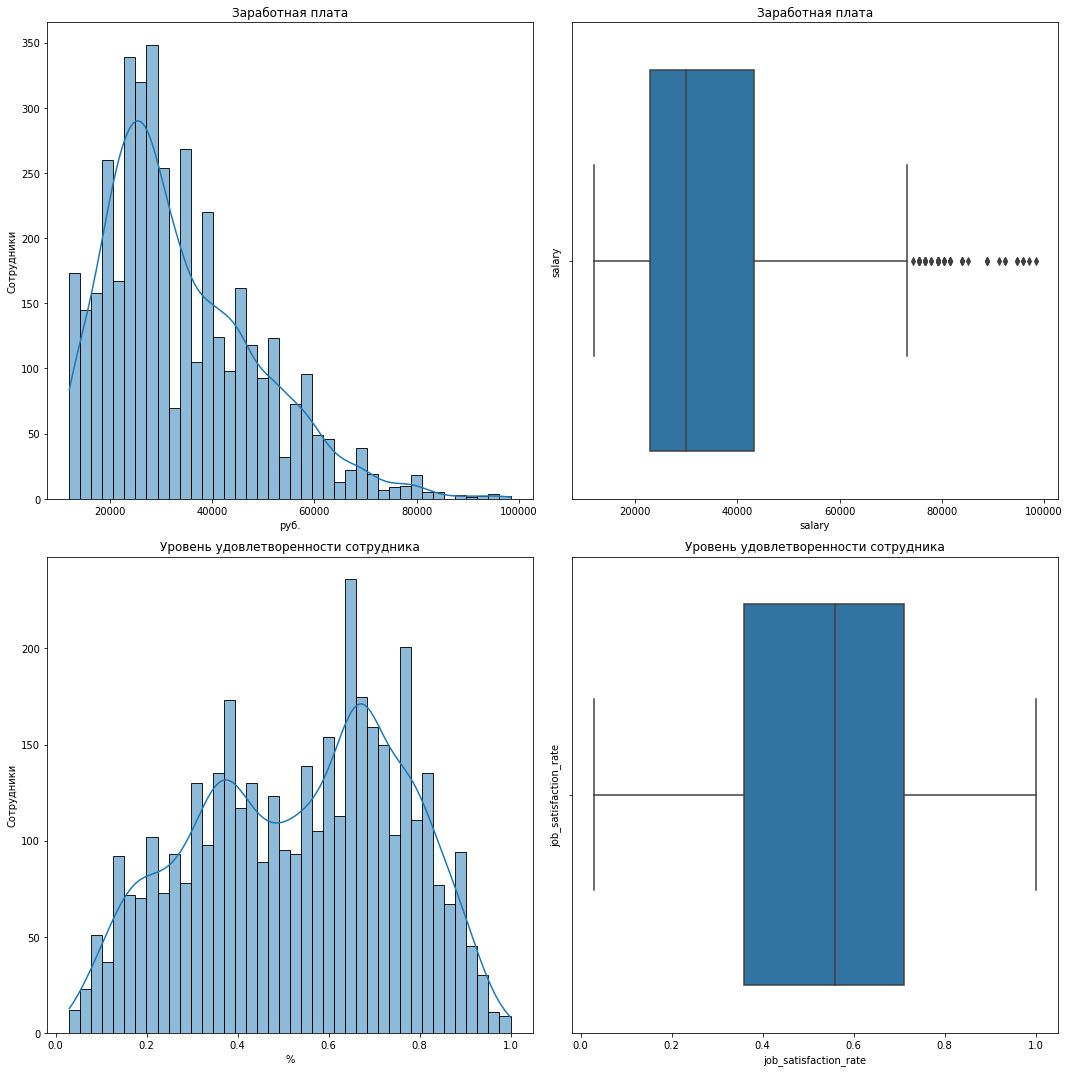

In [23]:
# Построим гистограммы и диаграмма размаха для всех непрерывных числовых столбцов таблицы на одном графике.

columns = hist_col_js  # Колонки для анализа
titles = ['Заработная плата', 'Уровень удовлетворенности сотрудника']  # Заголовки для осей
xlabels = ['руб.', '%']  # Подписи оси X

# Строим сетку графиков: каждая колонка делится на две части (гистограмма и бокс-плот)
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 15))

for i, col in enumerate(columns):
    # Левый график — гистограмма
    sns.histplot(data=train_js, x=col, ax=axes[i][0], bins=40, kde=True)
    axes[i][0].set_title(titles[i])
    axes[i][0].set_xlabel(xlabels[i])
    axes[i][0].set_ylabel('Сотрудники')
    
    # Правый график — диаграмма размаха
    sns.boxplot(data=train_js, x=col, orient='h', ax=axes[i][1])
    axes[i][1].set_title(titles[i])
    axes[i][1].set_ylabel(col)

plt.tight_layout()
plt.show()

**Комментарии**

Гистограмма распределения заработной платы имеет вид нормального распределения со смещением влево, это объясняется небольшим количеством сотрудников с высоким доходом. Такие данные нельзя считать выбросами, так как в датасете представлены сотрудники с разным уровнем занимаемой должности и опытом работы. Логично, что сотрудник на позиции senior и с опытом работы 5-7 лет будет получать значительно больше, чем недавно устроившийся в компанию junior. Среднее значение заработной платы (33 926) близко к медианному (30 000), дополнительной предобработки не требуется. 

Гистограмма распределения уровня удовлетворенности сотрудника также имеет вид нормального распределения, но с двумя вершинами около 0.4 и 0.7. Это может указывать на наличие двух разных подгрупп сотрудников в исследуемой выборке, например, довольных сотдрудников с высокой ЗП, и не очень довольных с низкой. Выбросов в данных нет, среднее значение также близко к медианному, дополнительной предобработки не требуется.   

In [25]:
# Функция для добавления подписей с процентами

def add_percentage_labels(ax):
    total = sum(p.get_height() for p in ax.patches)
    
    for p in ax.patches:
        height = p.get_height()
        percentage = f"{height/total*100:.1f}%"  # Вычисляем долю и преобразуем в строку с одним знаком после запятой
        
        if height > 0:  # Избегаем деления на ноль и отрицательных высот
            ax.annotate(
                percentage,
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 3),  # смещение вверх
                textcoords="offset points",
                ha='center',
                va='bottom'
            )

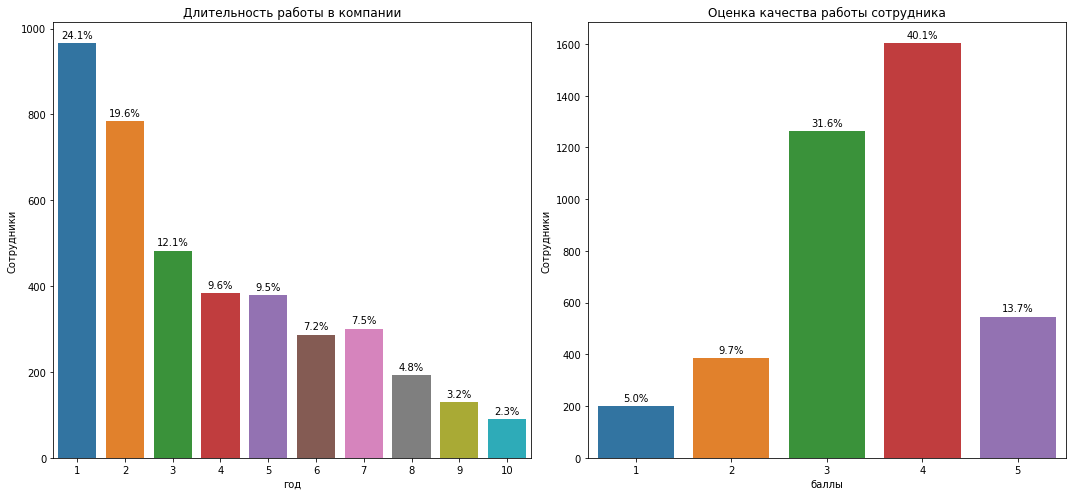

In [26]:
# Построим столбчатые диаграммы для всех дискретных числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(1, 2, figsize=(15, 7)) # Создаем сетку из 2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = num_col_js  # Колонки для анализа
titles = ['Длительность работы в компании', 'Оценка качества работы сотрудника']  # Заголовки для осей
xlabels = ['год', 'баллы']  # Подписи оси x


for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.countplot(data=train_js, x=col, ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Сотрудники')
    add_percentage_labels(ax)  # Добавляем подписи количества

plt.tight_layout()
plt.show()


**Комментарии**

Анализируя длительность работы в компании, можно заметить, что большая часть сотрудников работают в компании недолго (1-2 года), это может указывать либо на расширение штата, либо на большую текучку кадров, связанную с неудовлетворенностью сотрудников.

Рассматривая оценки качества работы сотрудников, видно, что самая частая оценка, которую давал руководитель - 4, затем идет 3. Только 1/8 часть сотрудников получила высшую оценку, это только может влиять на уровень удовлетворенности. Сотрудники могут чувствовать, что их недооценивает руководитель.



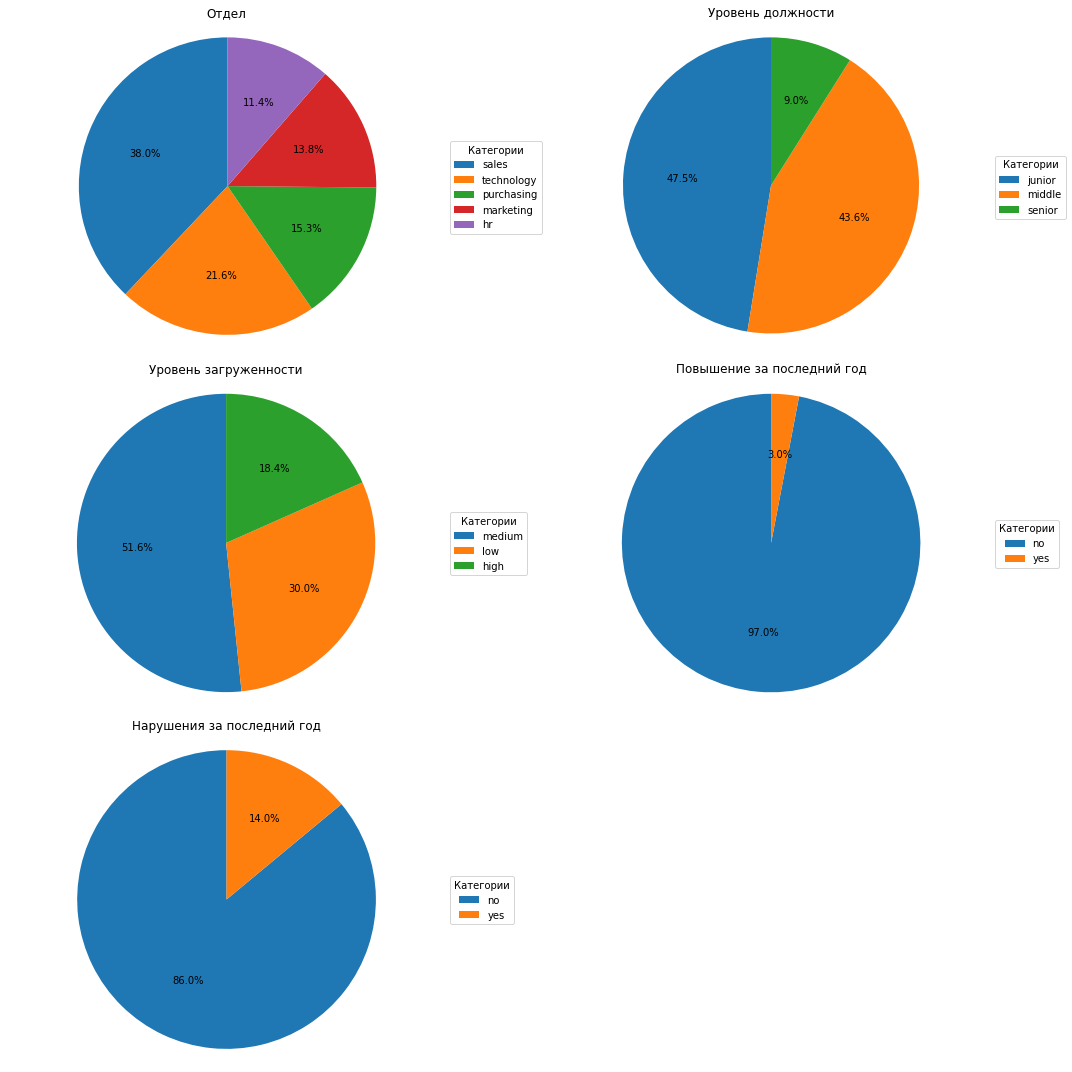

In [27]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = cat_col_js # Колонки для анализа
titles = ['Отдел', 'Уровень должности', 'Уровень загруженности', 
          'Повышение за последний год', 'Нарушения за последний год']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = train_js[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

# Удаляем пустые места, если кол-во колонок меньше 6
if len(columns) < 6:
    for ax in axes[len(columns):]:
        ax.axis('off')    
    
plt.tight_layout()  
plt.show()



**Комментарии**

Изучая категориальные признаки в датафрейме, можно сделать следующие выводы:
- Большая часть сотрудников (38%) работают в отделе продаж. Представитель технического отдела (21.6%) на втором места, за ним примерно в равных пропорциях следуют отделы закупок, маркетинга и HR (11-15%).
- Почти 90% всех сотрудников занимают должности уровня junior (47.5%) и middle (43.6%), опытных специалистов senior всего (9%).
- Половина сотрудников имеют средний уровень загруженности, 30% - низкий, и 18.4% - высокий. 
- Только 3% сотрудников получили повышение за последний год. Это очень малое количество, этот показатель может также оказывать влияние на удовлетворенность сотрудников.
- Большая часть сотрудников (86%) не имеют нарушений трудового договора за последний год.


In [28]:
# Создаём список с наименованиями количественных признаков
interval_cols = [
    'salary',
    'job_satisfaction_rate',
]

# Рассчитываем матрицу корреляций phi-k

corr_matrix_train_js = train_js.phik_matrix(interval_cols=interval_cols)
display(corr_matrix_train_js)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.016542,0.036815,0.000000,0.000000,0.105706,0.282657,0.082659
level,0.000000,1.000000,0.419591,0.682962,0.101668,0.000000,0.000000,0.717761,0.080753
workload,0.016542,0.419591,1.000000,0.181941,0.058663,0.000000,0.037023,0.788820,0.056128
employment_years,0.036815,0.682962,0.181941,1.000000,0.183579,0.056808,0.000000,0.483419,0.325603
last_year_promo,0.000000,0.101668,0.058663,0.183579,1.000000,0.000000,0.013681,0.215025,0.190803
last_year_violations,0.000000,0.000000,0.000000,0.056808,0.000000,1.000000,0.182042,0.010078,0.560348
supervisor_evaluation,0.105706,0.000000,0.037023,0.000000,0.013681,0.182042,1.000000,0.000000,0.764364
salary,0.282657,0.717761,0.788820,0.483419,0.215025,0.010078,0.000000,1.000000,0.165830
job_satisfaction_rate,0.082659,0.080753,0.056128,0.325603,0.190803,0.560348,0.764364,0.165830,1.000000


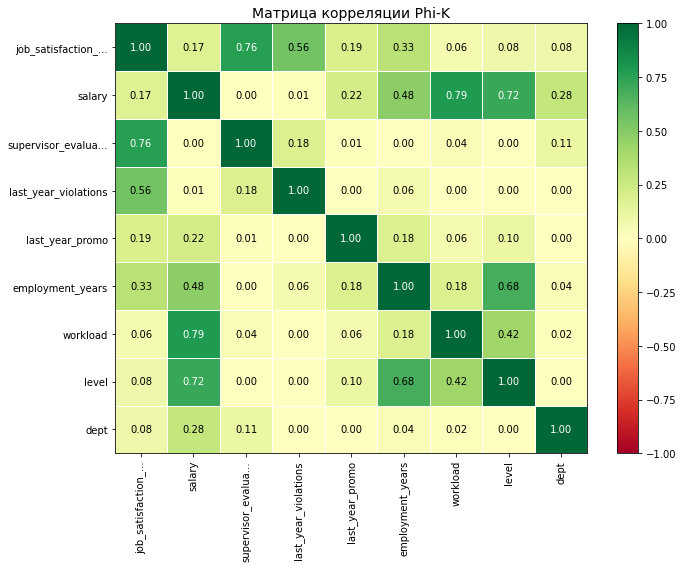

In [29]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_train_js.values,
                        x_labels=corr_matrix_train_js.columns,
                        y_labels=corr_matrix_train_js.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

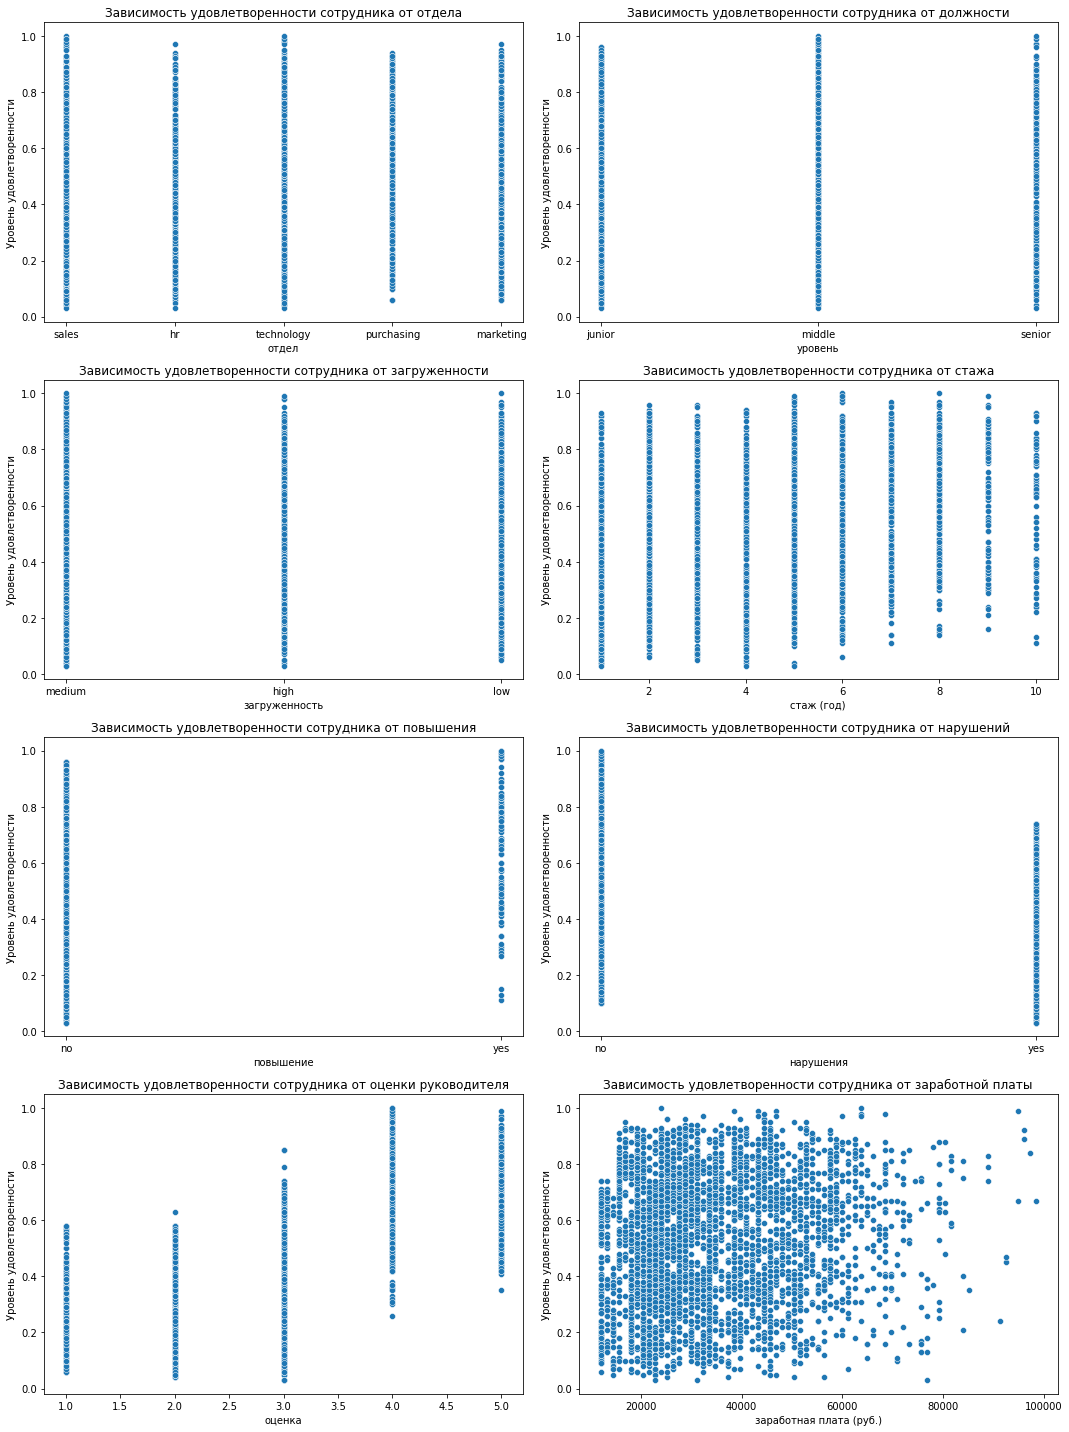

In [30]:
# Построим графики зависимости удовлетворенности сотрудников от других признаков 

fig, axes = plt.subplots(4, 2, figsize=(15, 20)) # Создаем сетку из 4х2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = ['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 
           'last_year_violations', 'supervisor_evaluation', 'salary']  # Колонки для анализа
titles = ['Зависимость удовлетворенности сотрудника от отдела', 
          'Зависимость удовлетворенности сотрудника от должности', 
          'Зависимость удовлетворенности сотрудника от загруженности',
          'Зависимость удовлетворенности сотрудника от стажа',
          'Зависимость удовлетворенности сотрудника от повышения',
          'Зависимость удовлетворенности сотрудника от нарушений', 
          'Зависимость удовлетворенности сотрудника от оценки руководителя',
          'Зависимость удовлетворенности сотрудника от заработной платы']  # Заголовки для осей
xlabels = ['отдел', 'уровень', 'загруженность', 'стаж (год)','повышение', 
           'нарушения', 'оценка', 'заработная плата (руб.)',]  # Подписи оси x


for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.scatterplot(x=train_js[col], y=train_js['job_satisfaction_rate'], ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Уровень удовлетворенности')
    add_percentage_labels(ax)  # Добавляем подписи количества

plt.tight_layout()
plt.show()



**Комментарии**

На тепловой карте темно-зеленые и красные тона говорят о сильной линейной зависимости, а светло-зеленые, желтые и оранжевые — о слабой. Анализируя матрицу корреляции Phi-K, можно сделать вывод, что наиболее выраженная связь между целевым признаком `job_satisfaction_rate` у входных признаков `supervisor_evaluation` (0.76), `last_year_violations` (0.56), менее заметная у признаков `employment_years` (0.33), а слабая у признаков `last_year_promo` (0.19) и `salary` (0.17). Корреляция с остальными признаками практически отсутствует. Диаграммы рассеяния показывают, что явно выраженных линейных зависимостей между целевым и входными признаками нет.

Касательно мультиколлинеарности других признаков корреляционная матрица показала, что между некоторыми входными признаками есть слабая, умеренная, заметная и высокая корреляция, но нет явных признаков сильной мультиколлинеарности (коэффициента корреляции от 0.9 до 0.95 по модулю), поэтому говорить о мультиколлинеарности мы не можем. Оставим данные без изменений.



### Датафрейм `test_js` 

In [31]:
# Сохраним количественные и категориальные колонки в разные переменные для дальнейшей визуализации

cat_col_test_js = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

num_col_test_js = ['employment_years', 'supervisor_evaluation']

hist_col_test_js = ['salary', 'job_satisfaction_rate']


In [32]:
# Статистическое описание колонок

print("Статистика:")
display(test_js.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
employment_years,2000.0,3.66650,2.537222,1.00,1.00,3.00,6.00,10.0
supervisor_evaluation,2000.0,3.52650,0.996892,1.00,3.00,4.00,4.00,5.0
salary,2000.0,34066.80000,15398.436729,12000.00,22800.00,30000.00,43200.00,96000.0
job_satisfaction_rate,2000.0,0.54878,0.220110,0.03,0.38,0.58,0.72,1.0


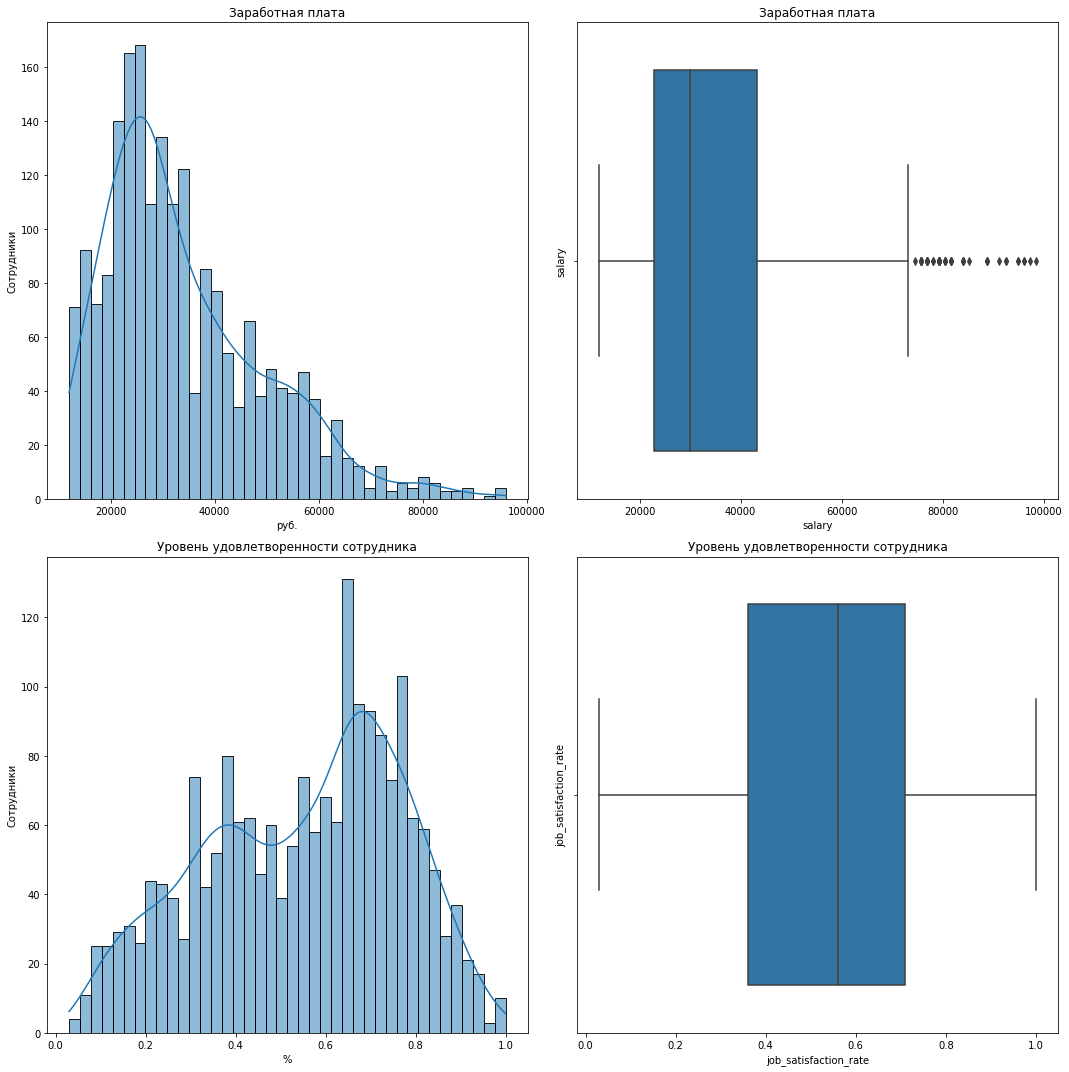

In [33]:
# Построим гистограммы и диаграмма размаха для всех непрерывных числовых столбцов таблицы на одном графике.

columns = hist_col_test_js  # Колонки для анализа
titles = ['Заработная плата', 'Уровень удовлетворенности сотрудника']  # Заголовки для осей
xlabels = ['руб.', '%']  # Подписи оси X

# Строим сетку графиков: каждая колонка делится на две части (гистограмма и бокс-плот)
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 15))

for i, col in enumerate(columns):
    # Левый график — гистограмма
    sns.histplot(data=test_js, x=col, ax=axes[i][0], bins=40, kde=True)
    axes[i][0].set_title(titles[i])
    axes[i][0].set_xlabel(xlabels[i])
    axes[i][0].set_ylabel('Сотрудники')
    
    # Правый график — диаграмма размаха
    sns.boxplot(data=train_js, x=col, orient='h', ax=axes[i][1])
    axes[i][1].set_title(titles[i])
    axes[i][1].set_ylabel(col)

plt.tight_layout()
plt.show()

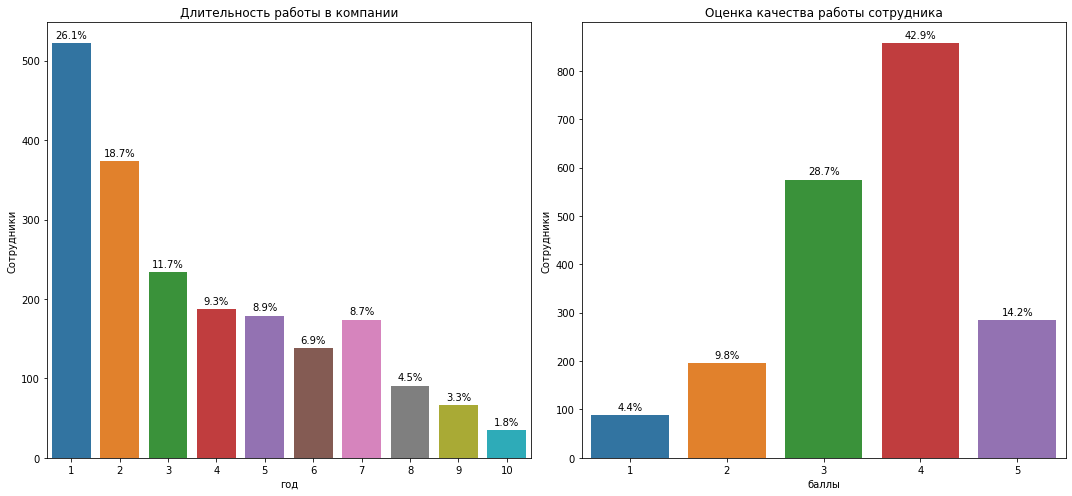

In [34]:
# Построим столбчатые диаграммы для всех дискретных числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Создаем сетку из 2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = num_col_test_js # Колонки для анализа
titles = ['Длительность работы в компании', 'Оценка качества работы сотрудника']  # Заголовки для осей
xlabels = ['год', 'баллы']  # Подписи оси х

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.countplot(data=test_js, x=col, ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Сотрудники')
    add_percentage_labels(ax)

plt.tight_layout()
plt.show()



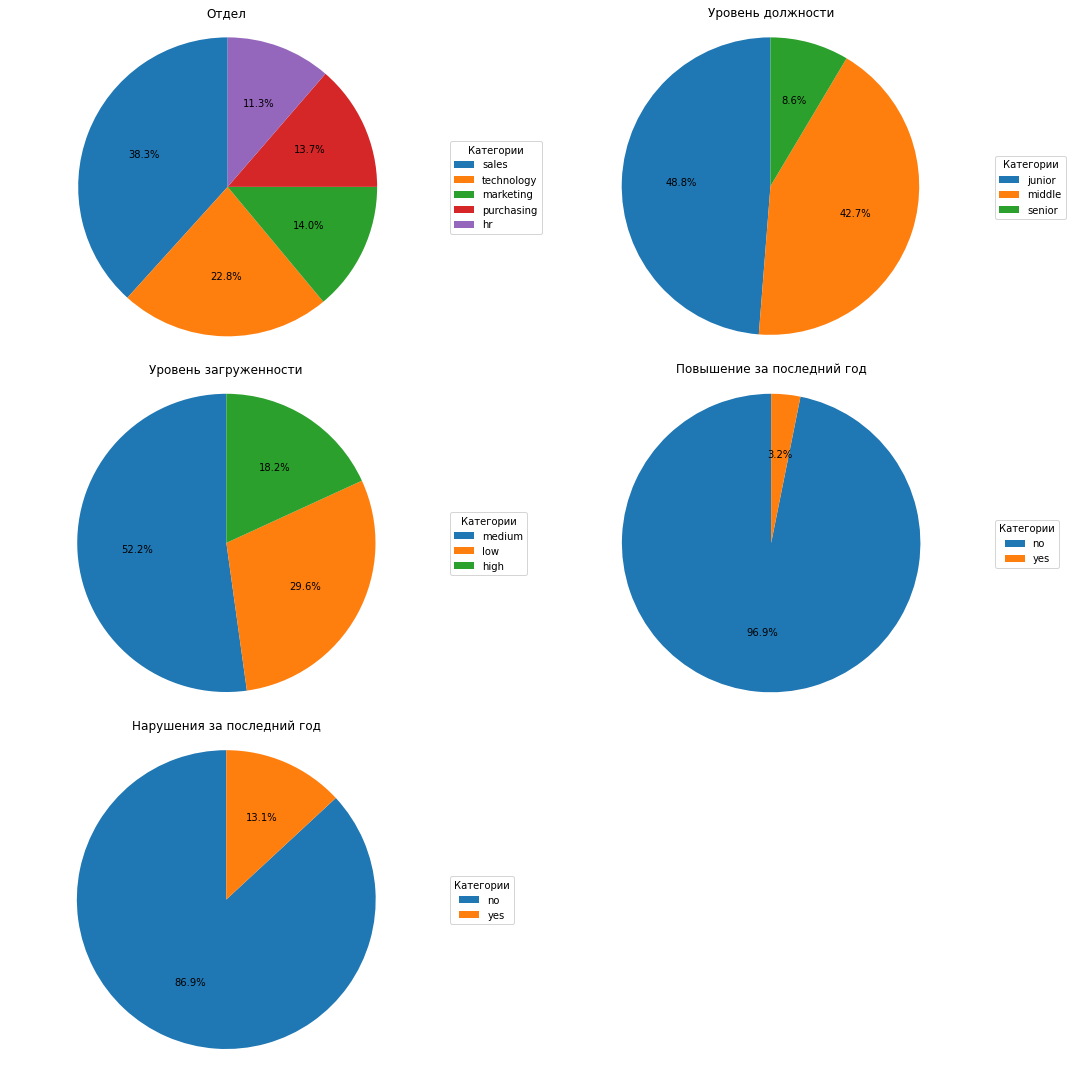

In [35]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = cat_col_test_js # Колонки для анализа
titles = ['Отдел', 'Уровень должности', 'Уровень загруженности', 
          'Повышение за последний год', 'Нарушения за последний год']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = test_js[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

# Удаляем пустые места, если кол-во колонок меньше 6
if len(columns) < 6:
    for ax in axes[len(columns):]:
        ax.axis('off')    
    
plt.tight_layout()  
plt.show()



In [36]:
# Создаём список с наименованиями количественных признаков
interval_cols = [
    'salary',
    'job_satisfaction_rate',
]
# Рассчитываем матрицу корреляций phi-k

corr_matrix_test_js = test_js.phik_matrix(interval_cols=interval_cols)
display(corr_matrix_test_js)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.000000,0.000000,0.030720,0.000000,0.000000,0.000000,0.058630,0.330057,0.073202
level,0.000000,1.000000,0.474453,0.689747,0.118283,0.017551,0.000000,0.749068,0.097007
workload,0.030720,0.474453,1.000000,0.202096,0.035565,0.000000,0.035920,0.785872,0.052157
employment_years,0.000000,0.689747,0.202096,1.000000,0.173637,0.066371,0.000000,0.494701,0.313525
last_year_promo,0.000000,0.118283,0.035565,0.173637,1.000000,0.000000,0.011704,0.193727,0.337002
last_year_violations,0.000000,0.017551,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000,0.554811
supervisor_evaluation,0.058630,0.000000,0.035920,0.000000,0.011704,0.189719,1.000000,0.114588,0.769857
salary,0.330057,0.749068,0.785872,0.494701,0.193727,0.000000,0.114588,1.000000,0.171903
job_satisfaction_rate,0.073202,0.097007,0.052157,0.313525,0.337002,0.554811,0.769857,0.171903,1.000000


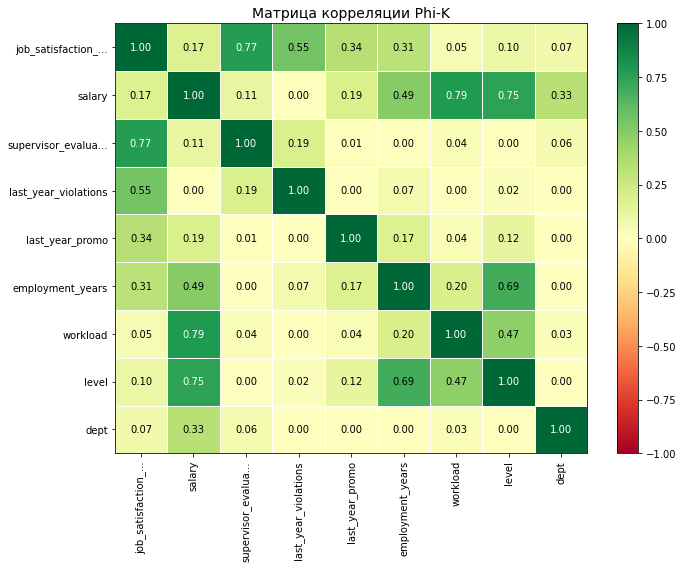

In [37]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_test_js.values,
                        x_labels=corr_matrix_test_js.columns,
                        y_labels=corr_matrix_test_js.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Комментарии**

По статистическим показателям и распределениям данные в тестовой выборке похожи на данные в тренировочной. Это значит, что они подойдут для оценки работы модели.

**Вывод**

По результатам исследовательского анализа данных можно сделать следующие выводы:
- Целевой признак распределен нормально с двумя пиковыми значениями (\~0.4 и \~0.7).
- Медианная зарплата в компании - 30 000. На графике видны выбросы, однако убирать их не будем в связи с их небольшим количеством и репрезентативностью высоких зарплат сотрудников.
- Обнаружен дисбаланс классов признака `employment_years`. В компании практически в 2 раза больше сотрудников, которые работают в ней до 3х лет: опытных сотрудников гораздо меньше. 
- Самая частая оценка, которую давал руководитель - 4, затем идет 3.
- Большая часть сотрудников (38%) работают в отделе продаж. Представитель технического отдела (21.6%) на втором места, за ним примерно в равных пропорциях следуют отделы закупок, маркетинга и HR (11-15%).
- Почти 90% всех сотрудников занимают должности уровня junior (47.5%) и middle (43.6%), опытных специалистов senior всего (9%).
- Половина сотрудников имеют средний уровень загруженности, 30% - низкий, и 18.4% - высокий. 
- Только 3% сотрудников получили повышение за последний год. 
- Большая часть сотрудников (86%) не имеют нарушений трудового договора за последний год.
- Наиболее выраженная связь между целевым признаком `job_satisfaction` у входных признаков `supervisor_evaluation` (0.76), `last_year_violations` (0.56), менее заметная у признаков `employment_years` (0.33), а слабая у признаков `last_year_promo` (0.19) и `salary` (0.17). Корреляция с остальными признаками практически отсутствует. Диаграммы рассеяния показывают, что явно выраженных линейных зависимостей между целевым и входными признаками нет. Признаков мультиколлинеарности нет.

От признаков со слабой корреляцией с целевым признаком избавляться не будем, так как они могут быть важны при принятии решения модели. Утечка целевого признака не обнаружена. Будем учитывать вышеописанные особенности данных при моделировании и подборе параметров, также стоит применить масштабирование.


## Подготовка данных в пайплайне

Для подготовки признаков будем использовать:
- MinMaxScaler/StandartScaler/RobustScaler для стобцов `employment_years`, `salary`
- OrdinalEncoder для столбцов `supervisor_evaluation`, `level`, `workload`
- OneHotEncoder для столбцов `dept`, `last_year_promo`, `last_year_violations`

In [38]:
# Проверим есть ли в подготовленных данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме train_js:', train_js.duplicated().sum())
display(train_js.loc[train_js.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме test_js:', test_js.duplicated().sum())
display(test_js.loc[test_js.duplicated(keep=False)])


Количество явных дубликатов в датафрейме train_js: 248


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20
798010,technology,junior,medium,3,no,no,4,27600,0.69
162817,sales,middle,medium,4,no,no,4,33600,0.49
166511,technology,junior,low,2,no,no,4,19200,0.88
...,...,...,...,...,...,...,...,...,...
737303,sales,middle,medium,3,no,no,4,33600,0.47
281204,technology,junior,low,2,no,no,4,15600,0.68
261436,sales,middle,low,3,no,no,3,22800,0.18


Количество явных дубликатов в датафрейме test_js: 83


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
686555,hr,junior,medium,1,no,no,4,30000,0.72
429973,purchasing,middle,medium,6,no,no,3,42000,0.67
834337,marketing,junior,low,1,no,no,3,16800,0.49
523542,marketing,junior,low,1,no,no,3,16800,0.49
535704,sales,junior,medium,1,no,no,4,21600,0.43
...,...,...,...,...,...,...,...,...,...
951029,marketing,junior,medium,2,no,no,5,24000,0.67
779595,sales,junior,medium,1,no,no,3,24000,0.36
535597,purchasing,junior,low,1,no,no,4,12000,0.57


In [39]:
# Удалим дубликаты в датафрейме train_js

train_js = train_js.drop_duplicates()

# Проверим результат

print('Количество явных дубликатов в датафрейме train_js:', train_js.duplicated().sum())

Количество явных дубликатов в датафрейме train_js: 0


In [41]:
# Загружаем данные для тестирования

y_test_js = test_js['job_satisfaction_rate']
X_test_js = test_js.drop(['job_satisfaction_rate'], axis = 1)

In [42]:
# Определяем тип признаков для пайплайна

ohe_columns = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'salary', 'supervisor_evaluation']

In [43]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование

ohe_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [44]:
# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                    # [1, 2, 3, 4, 5]
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


In [45]:
# Создаём общий пайплайн для подготовки данных

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [46]:
# Cоздаём итоговый пайплайн: подготовка данных и модель

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LinearRegression())
])


**Вывод** 

В настоящем разделе были написаны пайплайны для подготовки признаков для обучения модели. 

## Обучение и анализ моделей

### Создание собственной метрики SMAPE

In [47]:
# Создание собственной метрики SMAPE

def smape_score(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / ((np.abs(y_true) + np.abs(y_pred)) / 2))

smape_scorer = make_scorer(smape_score, greater_is_better = False)

**Комментарии**

Новая метрика — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). Функция принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. Критерий успеха: SMAPE ≤15 на тестовой выборке.

### Подбор гиперпараметров и кросс-валидация

In [48]:
 # Создаем сетку гиперпараметров для моделей

param_grid = [
    # Словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'models__min_samples_leaf': range(1, 8),
        'models__min_samples_split': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    
    # Словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(),  RobustScaler(), 'passthrough']  
    },
]

In [49]:
%%time
# Обучим модель

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv = 10,
    scoring=smape_scorer, 
    n_jobs=-1,
    error_score='raise'
)
grid_search.fit(X_train_js, y_train_js)


print('Лучшая модель:\n\n', grid_search.best_estimator_)
print('Параметры лучшей модели:', grid_search.best_params_)
print ('SMAPE лучшей модели на кросс-валидации:', (-1) * grid_search.best_score_)

Лучшая модель:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                           

**Комментарии**

Достигнув метрики SMAPE в 14.97 на кросс-валидации, лучше всех себя показала модель DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, random_state=42). Теперь, проверим её качество на тестовой выборке.

### Проверка модели на тестовых данных и анализ важности признаков

In [50]:
# Проверим работу модели на тестовой выборке

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_js)
test_score = smape_score(np.array(y_test_js), y_test_pred)

print ('SMAPE на тестовой выборке', test_score)

SMAPE на тестовой выборке 13.574960799149615


**Комментарии**

Метрика SMAPE на тестовой выборке составила 13.57, это меньше 15, что является критерием успеха. 

Диаграмма  Bar Plot используется для визуализации важности различных признаков в модели машинного обучения. Ось X показывает среднее значение абсолютного SHAP-значения для каждого признака. Чем больше значение, тем сильнее признак влияет на предсказание модели. Ось Y перечисляет признаки, упорядоченные по их важности. Признаки с наибольшим влиянием находятся в верхней части диаграммы. Цвета обычно используются для обозначения направления влияния признака на предсказание. Красный цвет может указывать на положительное влияние, а синий — на отрицательное. 

Диаграмма показывает, что наиболее важными признаками для модели являются `ord_supervisor_evaluation`, `num_employment_years`, `ord_level` и `num_salary`. Эти признаки оказывают наибольшее влияние на предсказание модели. Остальные признаки также вносят свой вклад, но их влияние менее значительно.


**Вывод**

Для поиска лучшей модели для предсказания уровня удовлетворенности сотрудников был использован инструмент `GridSearchCV`, который анализировал различные параметры для двух моделей `DecisionTreeRegressor()` и `LinearRegression()`. Также мы создали собственную метрику - SMAPE (симметричное среднее абсолютное процентное отклонение). 

Достигнув метрики SMAPE в 14.97 на кросс-валидации и 13.57 на тестовых данных, лучше всех себя показала модель DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, random_state=42). Данная модель справилась лучше линейной регрессии, так как лучше справляется при нелинейной зависимости признаков, а, учитывая матрицу корреляции, можно сказать, что в наших даннях признаков с такой зависимостью много.

# Вторая задача 

Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

##  Загрузка данных

In [52]:
# Считаем данные из csv-файлов в датафрейм и сохраним в переменные. 

try:
    train_quit = pd.read_csv('/datasets/train_quit.csv')
except:
    train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
    
try:
    X_test_quit = pd.read_csv('/datasets/test_features.csv')
except:
    X_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
    
try:
    y_test_quit = pd.read_csv('/datasets/test_target_quit.csv')
except:
    y_test_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')
    

In [53]:
# Выведем основную информацию о датафрейме train_quit

main_info(train_quit)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,4000.0,552099.28375,260158.031387,100222.0,327785.75,546673.0,781497.75,999915.0
employment_years,4000.0,3.70150,2.541852,1.0,2.00,3.0,6.00,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.00,4.0,4.00,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.00,30000.0,43200.00,96000.0




Первые строки:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


**Комментарии**

Датасет из файла `train_quit.csv` мы сохранили в переменную `train_quit`. Он содержит 4000 строк, пропусков нет. На первый взгляд типы данных распределены корректно, названия столбцов соответствуют правилам snake_case, статистические показатели выглядят правдоподобно и схожи с данными об удовлетворенности сотрудников. 
 


In [54]:
# Выведем основную информацию о датафрейме X_test_quit

main_info(X_test_quit)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.00,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.00,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.00,96000.0




Первые строки:


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


**Комментарии**

Датасет из файла `test_features.csv` мы сохранили в переменную `X_test_quit`. Он содержит 2000 строк, есть несколько пропусков в столбцах `dept` и `level`. Типы данных распределены корректно, названия столбцов соответствуют правилам snake_case, статистические показатели схожи с тренировочной выборкой, значит данные подойдут для тестирования.  

In [55]:
# Выведем основную информацию о датафрейме y_test_quit

main_info(y_test_quit)

Информация о структурах:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None



Статистика:


,count,mean,std,min,25%,50%,75%,max
id,2000.0,552765.2135,253851.326129,100298.0,339052.0,550793.0,765763.75,999029.0




Первые строки:


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


**Комментарии**

Датасет из файла `test_target_quit.csv` мы сохранили в переменную `y_test_quit`. Он содержит 2000 строк, пропусков нет. Типы данных распределены корректно, названия столбцов соответствуют правилам snake_case.  



**Вывод**

Полученные данные мы сохранили в три переменные: `train_quit` для тренировочной выборки; `X_test_quit` для входных признаков тестовой выборки; `y_test_quit` для данных целевого признака тестовой выборки. В датафреймах `train_quit` и `y_test_quit` отсутствуют пропуски, в `X_test_quit` есть несколько пропусков. На текщем этапе данные соответствуют описанию задачи. 

## Предобработка данных

### Обработка дубликатов


In [56]:
# Проверим есть ли в данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме train_quit:', train_quit.duplicated().sum())
display(train_quit.loc[train_quit.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме X_test_quit:', X_test_quit.duplicated().sum())
display(X_test_quit.loc[X_test_quit.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме y_test_quit:', y_test_quit.duplicated().sum())
display(y_test_quit.loc[y_test_quit.duplicated(keep=False)])


Количество явных дубликатов в датафрейме train_quit: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit


Количество явных дубликатов в датафрейме X_test_quit: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Количество явных дубликатов в датафрейме y_test_quit: 0


,id,quit


In [57]:
# Посмотрим на уникальные значения в категориальных данных в датафреймах

print('Датафрейм "train_quit"')
print('Отделы:', train_quit['dept'].unique())
print('Уровень занимаемой должности:', train_quit['level'].unique())
print('Уровень загруженности:', train_quit['workload'].unique())
print('Повышение за последний год:', train_quit['last_year_promo'].unique())
print('Нарушения за последний год:', train_quit['last_year_violations'].unique())
print('Статус увольнения:', train_quit['quit'].unique())
print()
print('Датафрейм "X_test_quit"')
print('Отделы:', X_test_quit['dept'].unique())
print('Уровень занимаемой должности:', X_test_quit['level'].unique())
print('Уровень загруженности:', X_test_quit['workload'].unique())
print('Повышение за последний год:', X_test_quit['last_year_promo'].unique())
print('Нарушения за последний год:', X_test_quit['last_year_violations'].unique())
print()
print('Датафрейм "y_test_quit"')
print('Статус увольнения:', y_test_quit['quit'].unique())


Датафрейм "train_quit"
Отделы: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уровень занимаемой должности: ['middle' 'junior' 'sinior']
Уровень загруженности: ['high' 'medium' 'low']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']
Статус увольнения: ['no' 'yes']

Датафрейм "X_test_quit"
Отделы: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
Уровень занимаемой должности: ['junior' 'middle' 'sinior' nan]
Уровень загруженности: ['medium' 'low' 'high' ' ']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']

Датафрейм "y_test_quit"
Статус увольнения: ['yes' 'no']


**Комментарии**

В списках уровней занимаемой должности также есть опечатка в слове "senior", ее необходимо исправить. В тестовых данных кроме пропусков типа nan тоже есть еще пустые строки ' ', их необходимо заменить на nan. 

In [58]:
# Произведем замены

train_quit['level'] = (
    train_quit['level']
    .str.replace('sinior', 'senior')
) 

X_test_quit['level'] = (
    X_test_quit['level']
    .str.replace('sinior', 'senior')
) 

X_test_quit['dept'] = (
    X_test_quit['dept']
    .replace(' ', np.nan)
) 

X_test_quit['workload'] = (
    X_test_quit['workload']
    .replace(' ', np.nan)
) 


In [59]:
# Проверим результат 

print('Датафрейм "train_quit"')
print('Отделы:', train_quit['dept'].unique())
print('Уровень занимаемой должности:', train_quit['level'].unique())
print('Уровень загруженности:', train_quit['workload'].unique())
print('Повышение за последний год:', train_quit['last_year_promo'].unique())
print('Нарушения за последний год:', train_quit['last_year_violations'].unique())
print('Статус увольнения:', train_quit['quit'].unique())
print()
print('Датафрейм "X_test_quit"')
print('Отделы:', X_test_quit['dept'].unique())
print('Уровень занимаемой должности:', X_test_quit['level'].unique())
print('Уровень загруженности:', X_test_quit['workload'].unique())
print('Повышение за последний год:', X_test_quit['last_year_promo'].unique())
print('Нарушения за последний год:', X_test_quit['last_year_violations'].unique())
print()
print('Датафрейм "y_test_quit"')
print('Статус увольнения:', y_test_quit['quit'].unique())

Датафрейм "train_quit"
Отделы: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
Уровень занимаемой должности: ['middle' 'junior' 'senior']
Уровень загруженности: ['high' 'medium' 'low']
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']
Статус увольнения: ['no' 'yes']

Датафрейм "X_test_quit"
Отделы: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
Уровень занимаемой должности: ['junior' 'middle' 'senior' nan]
Уровень загруженности: ['medium' 'low' 'high' nan]
Повышение за последний год: ['no' 'yes']
Нарушения за последний год: ['no' 'yes']

Датафрейм "y_test_quit"
Статус увольнения: ['yes' 'no']


In [60]:
# Проверим есть ли в данных явные строки-дубликаты после замены

print('Количество явных дубликатов в датафрейме train_quit:', train_quit.duplicated().sum())
display(train_quit.loc[train_quit.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме X_test_quit:', X_test_quit.duplicated().sum())
display(X_test_quit.loc[X_test_quit.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме y_test_quit:', y_test_quit.duplicated().sum())
display(y_test_quit.loc[y_test_quit.duplicated(keep=False)])

Количество явных дубликатов в датафрейме train_quit: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit


Количество явных дубликатов в датафрейме X_test_quit: 0


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Количество явных дубликатов в датафрейме y_test_quit: 0


,id,quit


### Обработка пропусков. 


In [61]:
# Повторно проверим количество пропущенных значений для каждого столбца во всех датафреймах.

print('Пропущенные значения в датафрейме train_quit: \n', train_quit.isna().sum())
print('Пропущенные значения в датафрейме X_test_quit: \n', X_test_quit.isna().sum())
print('Пропущенные значения в датафрейме y_test_quit: \n', y_test_quit.isna().sum())


Пропущенные значения в датафрейме train_quit: 
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64
Пропущенные значения в датафрейме X_test_quit: 
 id                       0
dept                     3
level                    1
workload                 1
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64
Пропущенные значения в датафрейме y_test_quit: 
 id      0
quit    0
dtype: int64


In [62]:
# Выведем все строки с пропущенными значениями в датасете

display(X_test_quit[X_test_quit['dept'].isnull() | X_test_quit['level'].isnull() | X_test_quit['workload'].isnull()])


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,NaN,4,no,no,4,28800
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800
1699,822186,NaN,middle,medium,3,no,no,4,38400


In [63]:
# Обработаем пропущенные значения при помощи пайплайна 

X_test_quit[nan_cols] = imputer_pipe.transform(X_test_quit[nan_cols])

# Проверка

display(X_test_quit[X_test_quit['dept'].isnull() | X_test_quit['level'].isnull() | X_test_quit['workload'].isnull()])
print('Пропущенные значения в датафрейме X_test_quit: \n', X_test_quit.isna().sum())


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary


Пропущенные значения в датафрейме X_test_quit: 
 id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


**Вывод**

В настоящем разделе мы провели первичную предобработку данных: проверили явные и неявные дубликаты, исправили опечатки, обработали пропуски в пайплайне. Можно приступать к исследовательскому анализу данных.


## Исследовательский анализ данных

In [64]:
# Объединим тестовые данные в один датафрейм

test_quit = pd.merge(X_test_quit, y_test_quit, on='id')  

# Перенесем столбец 'id' в индекс

train_quit.set_index('id', inplace=True)
test_quit.set_index('id', inplace=True)

# Проверим результат

display(train_quit.head(5))
display(test_quit.head(5))


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no
814010,sales,junior,medium,2,no,no,4,27600,no
155091,purchasing,middle,medium,5,no,no,1,37200,no
257132,sales,junior,medium,2,no,yes,3,24000,yes
910140,marketing,junior,medium,2,no,no,5,25200,no


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no
686555,hr,junior,medium,1,no,no,4,30000,no
467458,sales,middle,low,5,no,no,4,19200,no
418655,sales,middle,low,6,no,no,4,19200,no
789145,hr,middle,medium,5,no,no,5,40800,no


In [65]:
# Выведем размер всех датафреймов

print('Датафрейм train_quit:', train_quit.shape)
print('Датафрейм test_quit:', test_quit.shape)


Датафрейм train_quit: (4000, 9)
Датафрейм test_quit: (2000, 9)


### Датафрейм `train_quit`

In [66]:
# Сохраним количественные и категориальные колонки в разные переменные для дальнейшей визуализации

cat_col_quit = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

num_col_quit = ['employment_years', 'supervisor_evaluation']

hist_col_quit = ['salary']


In [67]:
# Статистическое описание колонок

print("Статистика:")
display(train_quit.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
employment_years,4000.0,3.70150,2.541852,1.0,2.0,3.0,6.0,10.0
supervisor_evaluation,4000.0,3.47475,1.004049,1.0,3.0,4.0,4.0,5.0
salary,4000.0,33805.80000,15152.415163,12000.0,22800.0,30000.0,43200.0,96000.0


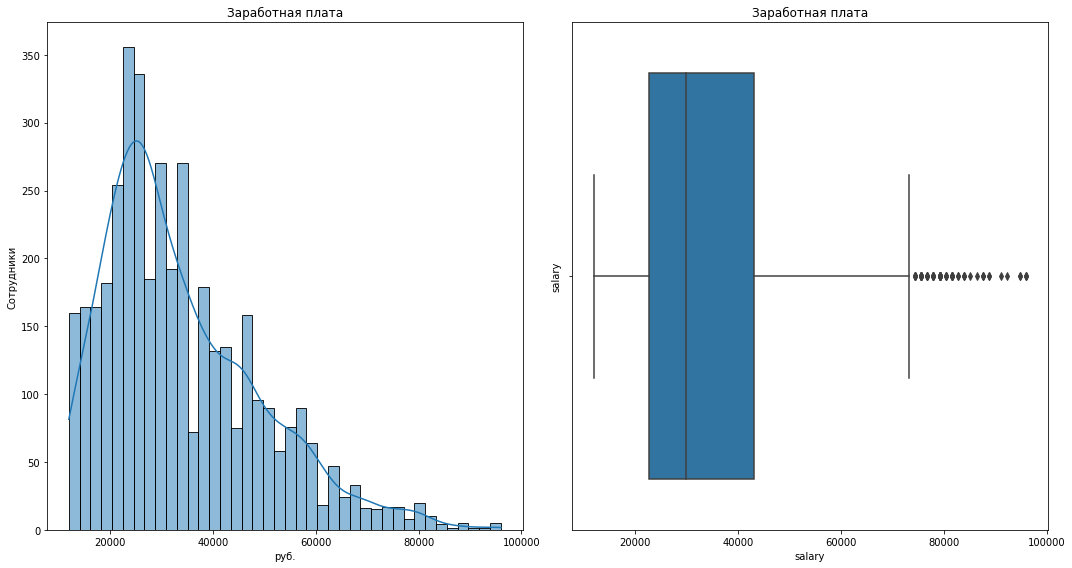

In [68]:
# Построим гистограммы и диаграмма размаха для всех непрерывных числовых столбцов таблицы на одном графике.

columns = hist_col_quit  # Колонки для анализа
titles = ['Заработная плата']  # Заголовки для осей
xlabels = ['руб.']  # Подписи оси X

# Строим сетку графиков: каждая колонка делится на две части (гистограмма и бокс-плот)
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 8))

for i, col in enumerate(columns):
    # Левый график — гистограмма
    sns.histplot(data=train_quit, x=col, ax=axes[0], bins=40, kde=True)
    axes[0].set_title(titles[i])
    axes[0].set_xlabel(xlabels[i])
    axes[0].set_ylabel('Сотрудники')
    
    # Правый график — диаграмма размаха
    sns.boxplot(data=train_quit, x=col, orient='h', ax=axes[1])
    axes[1].set_title(titles[i])
    axes[1].set_ylabel(col)

plt.tight_layout()
plt.show()

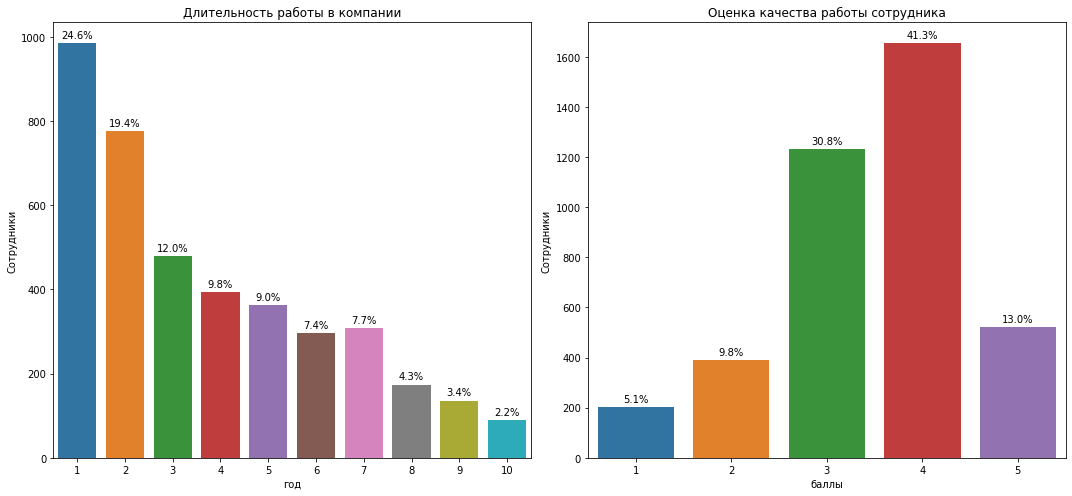

In [69]:
# Построим столбчатые диаграммы для всех дискретных числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Создаем сетку из 2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = num_col_quit # Колонки для анализа
titles = ['Длительность работы в компании', 'Оценка качества работы сотрудника']  # Заголовки для осей
xlabels = ['год', 'баллы']  # Подписи оси х

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.countplot(data=train_quit, x=col, ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Сотрудники')
    add_percentage_labels(ax)  # Добавляем подписи количества

plt.tight_layout()
plt.show()



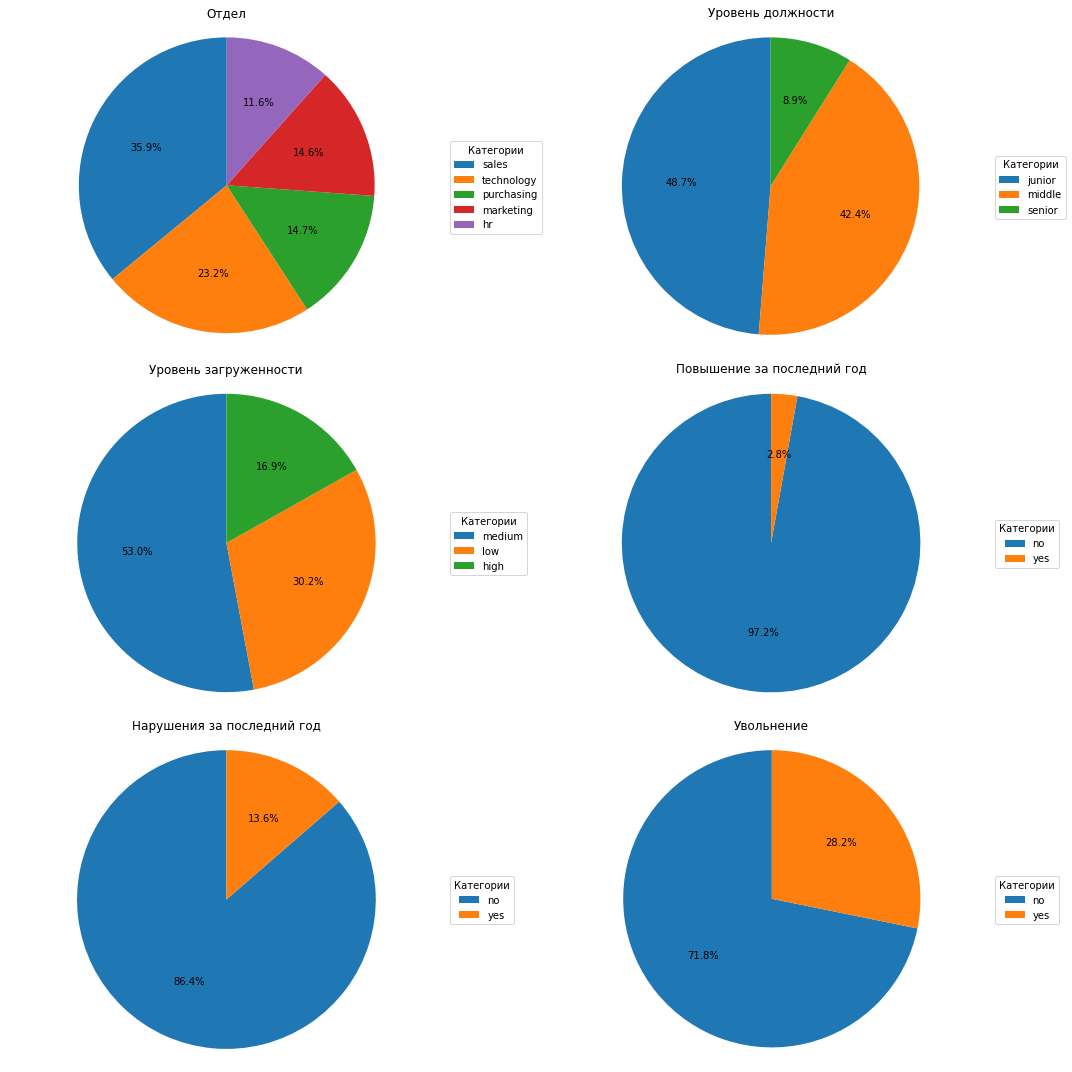

In [70]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = cat_col_quit # Колонки для анализа
titles = ['Отдел', 'Уровень должности', 'Уровень загруженности', 
          'Повышение за последний год', 'Нарушения за последний год', 'Увольнение']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = train_quit[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

    
plt.tight_layout()  
plt.show()



In [71]:
# Создаём список с наименованиями количественных признаков
interval_cols_quit = ['salary']

# Рассчитываем матрицу корреляций phi-k

corr_matrix_train_quit = train_quit.phik_matrix(interval_cols=interval_cols_quit)
display(corr_matrix_train_quit)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.280300,0.000000
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.745104,0.312799
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.793876,0.132243
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.491915,0.659093
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.215043,0.157370
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.086087,0.185071
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.055330,0.245489
salary,0.280300,0.745104,0.793876,0.491915,0.215043,0.086087,0.055330,1.000000,0.564154
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.564154,1.000000


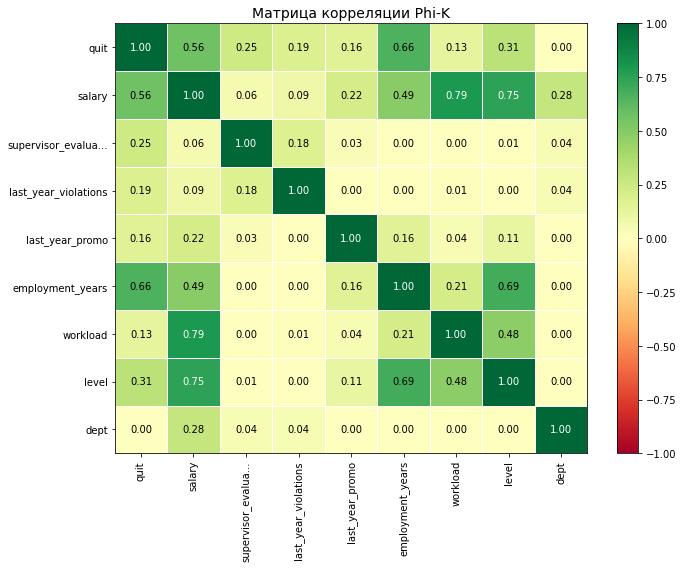

In [72]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_train_quit.values,
                        x_labels=corr_matrix_train_quit.columns,
                        y_labels=corr_matrix_train_quit.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Комментарии**

По статистическим показателям и распределениям данные в тренировочной выборке целевого признака `quit` похожи на данные в тренировочной выборке целевого признака `job_satisfaction`. Анализируя матрицу корреляции Phi-K, можно сделать вывод, что наиболее выраженная связь между целевым признаком `quit` у входных признаков `employment_years` (0.66), `salary` (0.56), менее заметная у признаков `level` (0.31) и `supervisor_evaluation` (0.25), а слабая у признаков `last_year_violations` (0.19), `last_year_promo` (0.16) и `workload` (0.13). Корреляция с признаком `dept` отсутствует. Признаков мультиколлинеарности не обнаружено. Оставим данные без изменений.



### Датафрейм `test_quit`

In [73]:
# Сохраним количественные и категориальные колонки в разные переменные для дальнейшей визуализации

cat_col_test_quit = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']

num_col_test_quit = ['employment_years', 'supervisor_evaluation']

hist_col_test_quit = ['salary']


In [74]:
# Статистическое описание колонок

print("Статистика:")
display(test_quit.describe().T)

Статистика:


,count,mean,std,min,25%,50%,75%,max
employment_years,2000.0,3.6665,2.537222,1.0,1.0,3.0,6.0,10.0
supervisor_evaluation,2000.0,3.5265,0.996892,1.0,3.0,4.0,4.0,5.0
salary,2000.0,34066.8000,15398.436729,12000.0,22800.0,30000.0,43200.0,96000.0


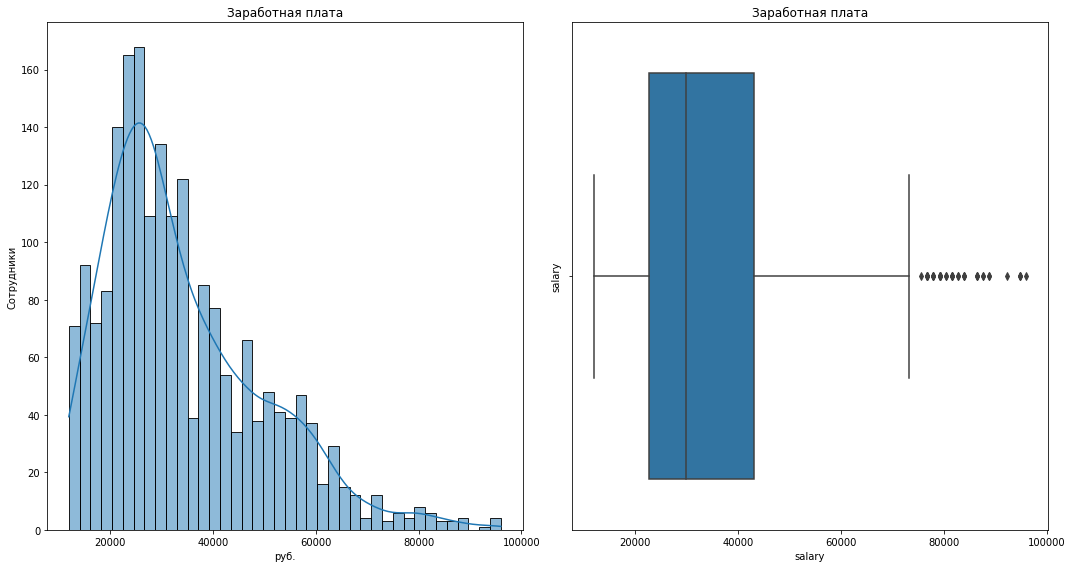

In [75]:
# Построим гистограммы и диаграмма размаха для всех непрерывных числовых столбцов таблицы на одном графике.

columns = hist_col_test_quit  # Колонки для анализа
titles = ['Заработная плата']  # Заголовки для осей
xlabels = ['руб.']  # Подписи оси X

# Строим сетку графиков: каждая колонка делится на две части (гистограмма и бокс-плот)
fig, axes = plt.subplots(len(columns), 2, figsize=(15, 8))

for i, col in enumerate(columns):
    # Левый график — гистограмма
    sns.histplot(data=test_quit, x=col, ax=axes[0], bins=40, kde=True)
    axes[0].set_title(titles[i])
    axes[0].set_xlabel(xlabels[i])
    axes[0].set_ylabel('Сотрудники')
    
    # Правый график — диаграмма размаха
    sns.boxplot(data=X_test_quit, x=col, orient='h', ax=axes[1])
    axes[1].set_title(titles[i])
    axes[1].set_ylabel(col)

plt.tight_layout()
plt.show()

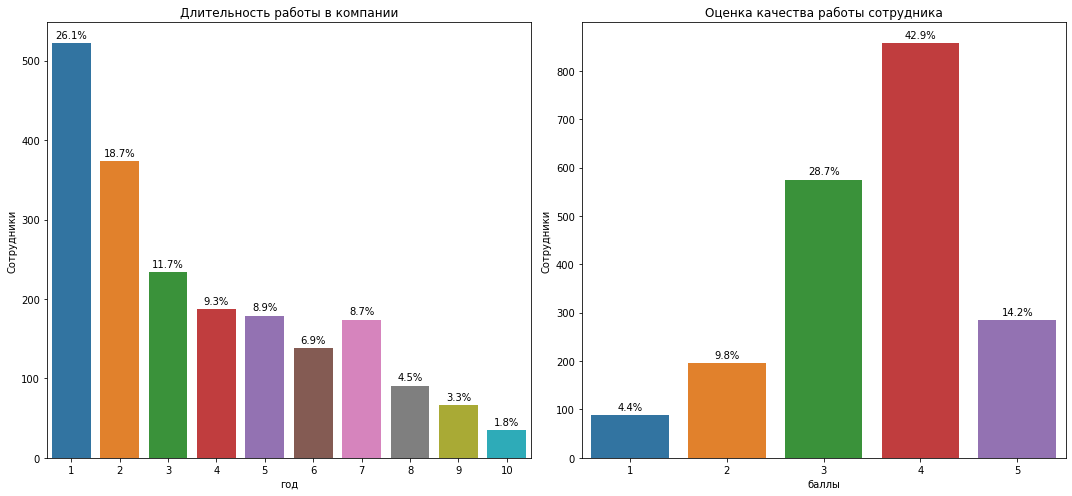

In [76]:
# Построим столбчатые диаграммы для всех дискретных числовых столбцов таблицы на одном графике.

fig, axes = plt.subplots(1, 2, figsize=(15, 7))  # Создаем сетку из 2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = num_col_test_quit # Колонки для анализа
titles = ['Длительность работы в компании', 'Оценка качества работы сотрудника']  # Заголовки для осей
xlabels = ['год', 'баллы']  # Подписи оси х

for ax, col, title, xlabel in zip(axes, columns, titles, xlabels):
    sns.countplot(data=test_quit, x=col, ax=ax)
    ax.set(title=title, xlabel=xlabel, ylabel='Сотрудники')
    add_percentage_labels(ax)  # Добавляем подписи количества

plt.tight_layout()
plt.show()



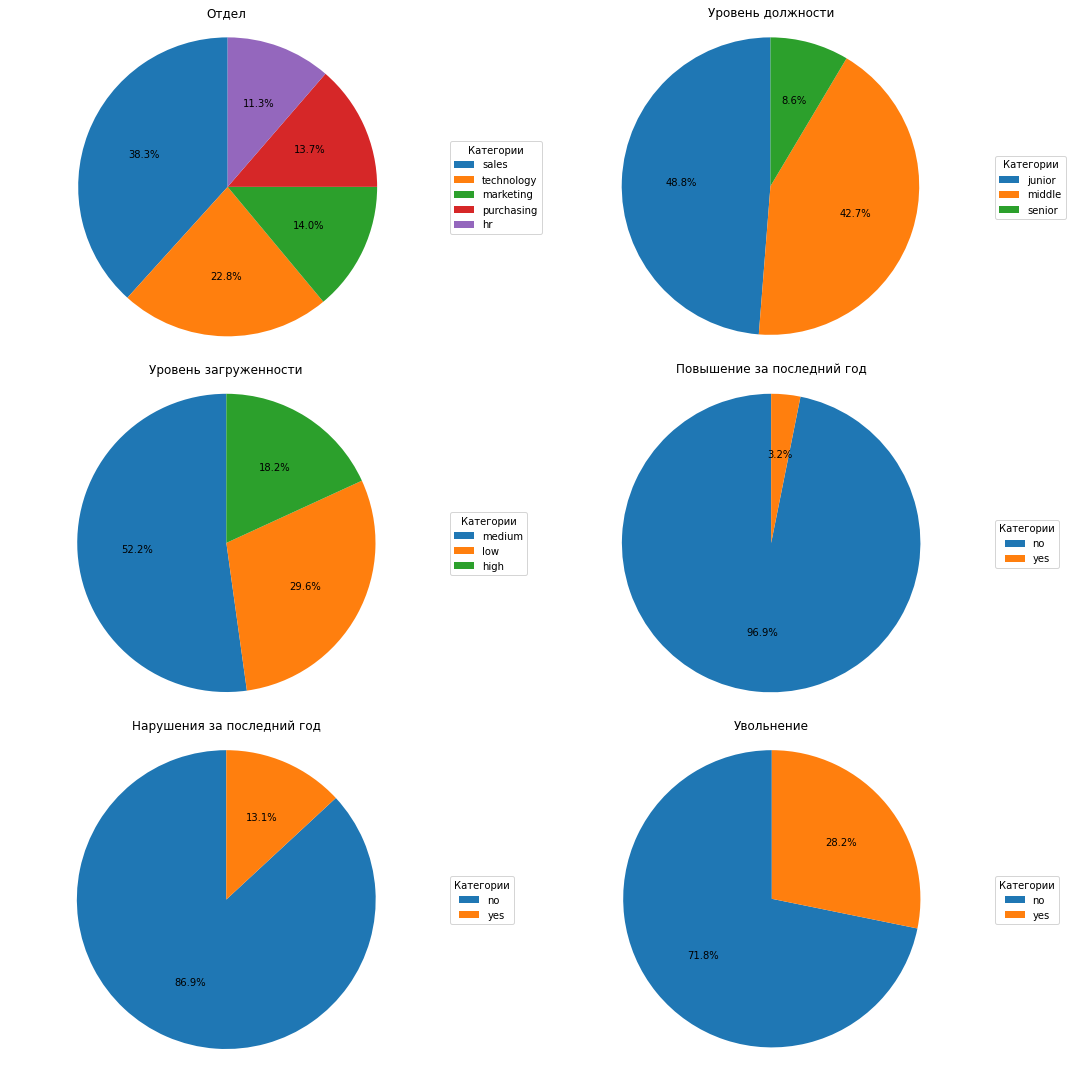

In [77]:
# Построим круговые диаграммы для всех категориальных столбцов на одном графике.

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Создаем сетку из 3x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns = cat_col_test_quit # Колонки для анализа
titles = ['Отдел', 'Уровень должности', 'Уровень загруженности', 
          'Повышение за последний год', 'Нарушения за последний год', 'Увольнение']  # Заголовки для осей

# Проход по колонкам и создание круговых диаграмм
for i, (col, title) in enumerate(zip(columns, titles)):
    if i >= len(axes):
        break
    
    counts = test_quit[col].value_counts().sort_values(ascending=False)  # Подсчет количества записей для каждого значения
    labels = counts.index  # Метки категорий
    sizes = counts.values  # Доли значений
    
    # Построение круговой диаграммы
    wedges, texts, autotexts = axes[i].pie(sizes, labels=None, autopct='%1.1f%%', startangle=90)
    axes[i].legend(wedges, labels,
                   title="Категории",
                   loc="center left",
                   bbox_to_anchor=(1, 0, 0.5, 1))
    axes[i].set_title(title)
    axes[i].axis('equal')  # Устанавливаем равный масштаб осей, чтобы получился правильный круг

plt.tight_layout()  
plt.show()



In [78]:
# Рассчитываем матрицу корреляций phi-k

corr_matrix_test_quit = test_quit.phik_matrix(interval_cols=interval_cols_quit)
display(corr_matrix_test_quit)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
dept,1.000000,0.000000,0.030720,0.000000,0.000000,0.000000,0.058630,0.330057,0.000000
level,0.000000,1.000000,0.474453,0.689747,0.118283,0.017551,0.000000,0.749068,0.293881
workload,0.030720,0.474453,1.000000,0.202096,0.035565,0.000000,0.035920,0.785872,0.102236
employment_years,0.000000,0.689747,0.202096,1.000000,0.173637,0.066371,0.000000,0.494701,0.605927
last_year_promo,0.000000,0.118283,0.035565,0.173637,1.000000,0.000000,0.011704,0.193727,0.137762
last_year_violations,0.000000,0.017551,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000,0.174740
supervisor_evaluation,0.058630,0.000000,0.035920,0.000000,0.011704,0.189719,1.000000,0.114588,0.294738
salary,0.330057,0.749068,0.785872,0.494701,0.193727,0.000000,0.114588,1.000000,0.508308
quit,0.000000,0.293881,0.102236,0.605927,0.137762,0.174740,0.294738,0.508308,1.000000


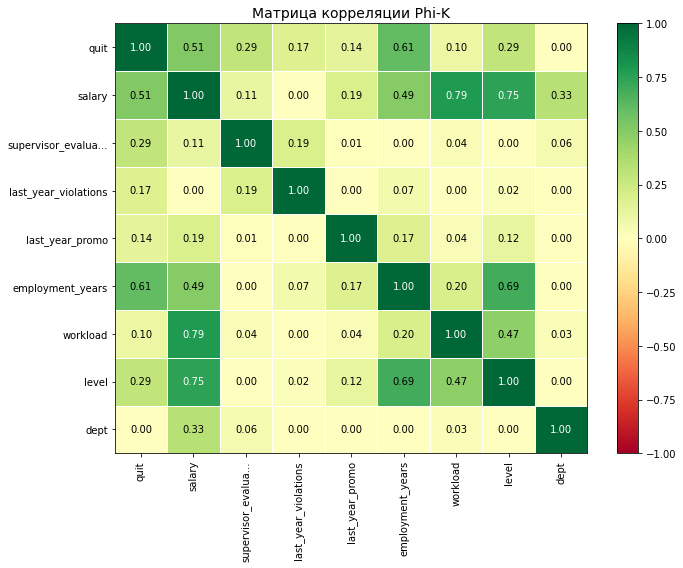

In [79]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_test_quit.values,
                        x_labels=corr_matrix_test_quit.columns,
                        y_labels=corr_matrix_test_quit.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Комментарии**

По статистическим показателям и распределениям данные в тестовой выборке похожи на данные в тренировочной. Это значит, что они подойдут для оценки работы модели.

### Портрет «уволившегося сотрудника»


In [80]:
# Отсортируем данные сотрудников, которые уволились и тех, кто остался

data_quit = train_quit[train_quit['quit'] == 'yes']
data_stay = train_quit[train_quit['quit'] == 'no']

# Проверим результат

print(train_quit.shape)
print(data_quit.shape)
print(data_stay.shape)
display(data_quit.head(5))

(4000, 9)
(1128, 9)
(2872, 9)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
id,,,,,,,,,
257132,sales,junior,medium,2,no,yes,3,24000,yes
699916,sales,junior,low,1,no,yes,3,18000,yes
613206,technology,middle,medium,2,no,no,3,45600,yes
468145,technology,junior,medium,2,no,no,3,30000,yes
982346,marketing,junior,medium,3,no,no,3,30000,yes


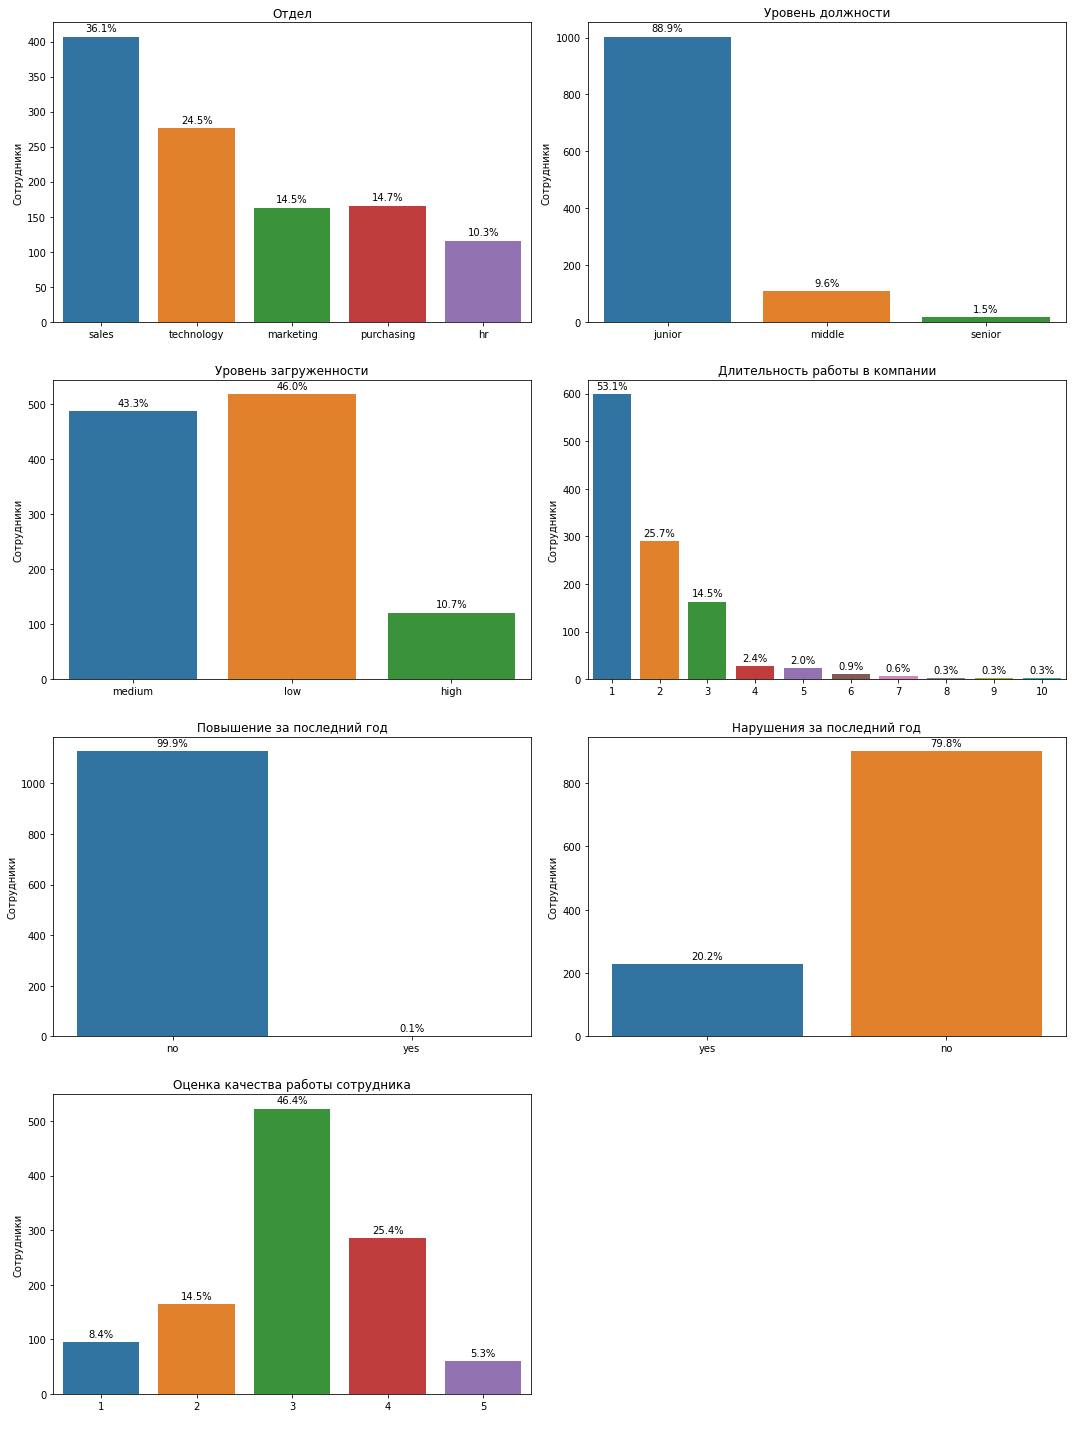

In [81]:
# Построим столбчатые диаграммы для всех столбцов таблицы на одном графике.

fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Создаем сетку из 4x2 подграфиков
axes = axes.flatten()  # Преобразуем массив двумерный в одномерный

columns =  ['dept', 'level', 'workload', 'employment_years', 
            'last_year_promo', 'last_year_violations', 'supervisor_evaluation'] # Колонки для анализа
titles = ['Отдел', 'Уровень должности', 'Уровень загруженности', 'Длительность работы в компании', 
          'Повышение за последний год', 'Нарушения за последний год', 'Оценка качества работы сотрудника']  # Заголовки для осей

for ax, col, title in zip(axes, columns, titles):
    sns.countplot(data=data_quit, x=col, ax=ax)
    ax.set(title=title, xlabel=' ', ylabel='Сотрудники')
    add_percentage_labels(ax)  # Добавляем подписи количества
    
# Удаляем пустые места, если кол-во колонок меньше 8
if len(columns) < 8:
    for ax in axes[len(columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()



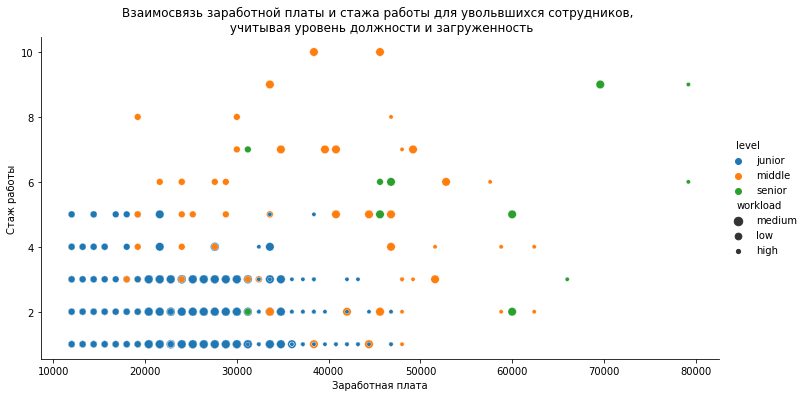

In [82]:
# Визуализируем данные для сегмента уволившихся сотрудников

sns.relplot(data = data_quit, x = 'salary', 
            y ='employment_years', 
            hue = 'level', 
            size = 'workload', 
            aspect = 2)
plt.title('Взаимосвязь заработной платы и стажа работы для увольвшихся сотрудников, \n учитывая уровень должности и загруженность')
plt.xlabel('Заработная плата')
plt.ylabel('Стаж работы')

plt.show()

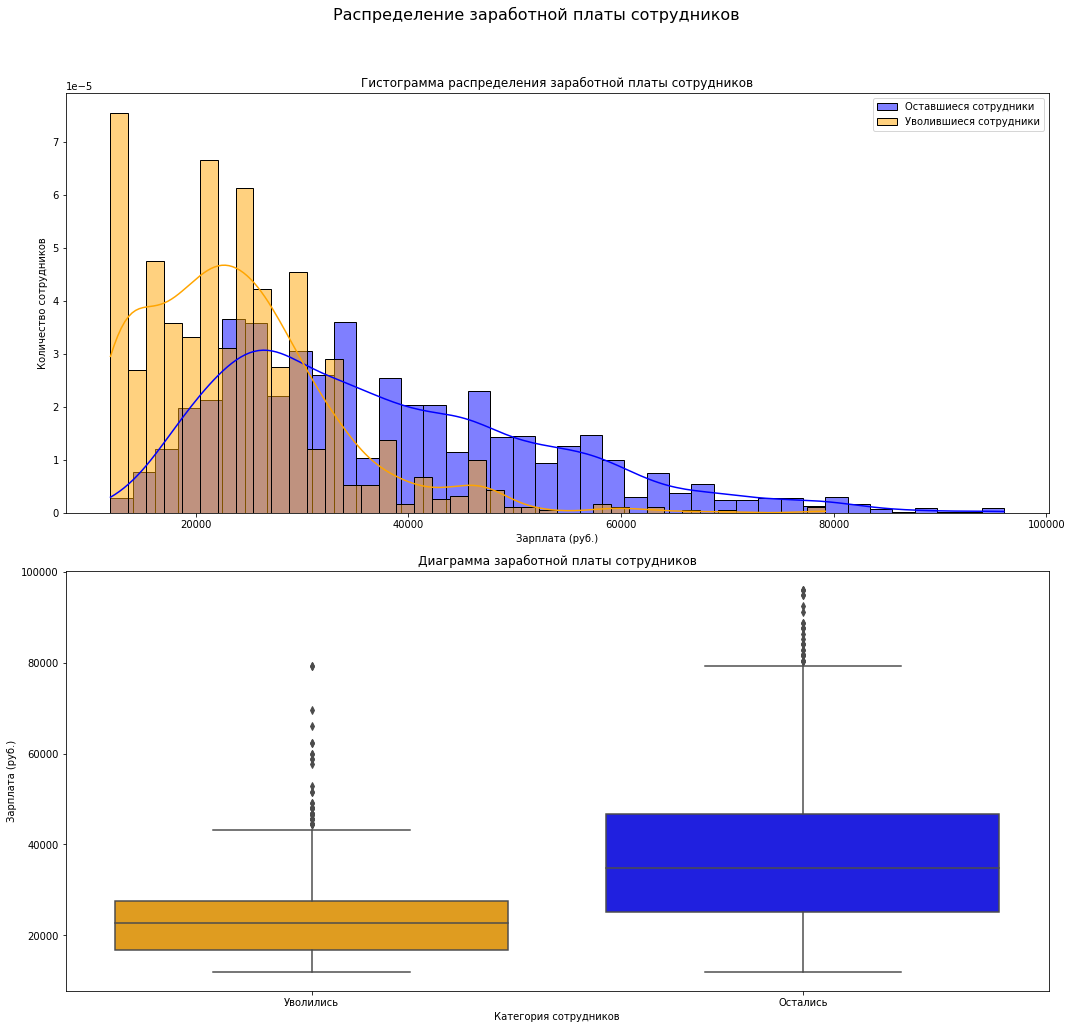

Средняя зарплата оставшихся сотрудников: 37702.23
Медианная зарплата оставшихся сотрудников: 34800.00
Средняя зарплата уволившихся сотрудников: 23885.11
Медианная зарплата уволившихся сотрудников: 22800.00


In [84]:
# Объединяем обе категории в один датафрейм для удобства построения боксплота
combined_data = pd.concat([data_quit.assign(category='Уволились'), data_stay.assign(category='Остались')])

# Создание сетки графиков: один столбец с двумя строками (гистограмма и боксплот)
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Построение гистограммы зарплат для двух групп сотрудников
sns.histplot(data=data_stay['salary'], 
             color="blue", 
             ax=axes[0], 
             bins=40, 
             kde=True, 
             stat='density', 
             common_norm=False,
             label='Оставшиеся сотрудники')
sns.histplot(data=data_quit['salary'], 
             color="orange", 
             ax=axes[0], 
             bins=40, 
             kde=True,
             stat='density', 
             common_norm=False,
             label='Уволившиеся сотрудники')
axes[0].legend()
axes[0].set_title("Гистограмма распределения заработной платы сотрудников")
axes[0].set_xlabel("Зарплата (руб.)")
axes[0].set_ylabel("Количество сотрудников")

# Боксплот: строим сразу оба бокса на одной панели, используя объединённую таблицу
sns.boxplot(x='category',
            y='salary', 
            data=combined_data, 
            palette={'Уволились': 'orange', 'Остались': 'blue'}, 
            ax=axes[1])
axes[1].set_title("Диаграмма заработной платы сотрудников")
axes[1].set_xlabel("Категория сотрудников")
axes[1].set_ylabel("Зарплата (руб.)")

plt.suptitle('Распределение заработной платы сотрудников', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Статистика по зарплатам
print(f'Средняя зарплата оставшихся сотрудников: {data_stay["salary"].mean():.2f}')
print(f'Медианная зарплата оставшихся сотрудников: {data_stay["salary"].median():.2f}')
print(f'Средняя зарплата уволившихся сотрудников: {data_quit["salary"].mean():.2f}')
print(f'Медианная зарплата уволившихся сотрудников: {data_quit["salary"].median():.2f}')


**Комментарии**

Составляя портрет "уволившегося сотрудника" можно выделить несколько особенностей:
- Распределение по отделам примерно равномерное, но больше всего уволилось сотрудников из отделов sales и technology.
- Практически 90% уволившихся - уровень junior.
- Загруженность на работе в большинстве случаев low/medium.
- Уволившийся сотрудник работал в компании, как правило, меньше 3х лет (в большинстве всего 1 год).
- За последний год у уволившихся сотрудников не было повышений.
- При этом в большей степени нарушений трудового договора также не было.
- Большинство уволившихся сотрудников получали оценку 3 от руководителя, вторая оценка по количеству - 4.
- Средняя заработная плата неуволившегося сотрудника практически в половину больше, чем у уволившегося.

Таким образом, можно сделать вывод, что в чаще всего из компании увольнялись сотрудники с позиций junior в первый год работы. Возможными причинами увольнений могли стать низкая заработная плата, отсутствие повышения и признания работы со стороны руководителя (оценка 3).

### Удовлетворённость работой и увольнение


**Комментарии**

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверим это утверждение на тестовых данных продоставленных датасетов. 

In [85]:
# Объединим данные тестовых выборок

target_dependence = pd.DataFrame(y_test_js).merge(pd.DataFrame(y_test_quit), on='id', how='left')
target_dependence.head()

,id,job_satisfaction_rate,quit
0,485046,0.79,no
1,686555,0.72,no
2,467458,0.64,no
3,418655,0.60,no
4,789145,0.75,no


In [86]:
# Отсортируем данные сотрудников, которые уволились и тех, кто остался

target_dependence_quit = target_dependence[target_dependence['quit'] == 'yes']
target_dependence_stay = target_dependence[target_dependence['quit'] == 'no']

# Проверим результат

print(target_dependence.shape)
print(target_dependence_stay.shape)
print(target_dependence_quit.shape)


(2000, 3)
(1436, 3)
(564, 3)


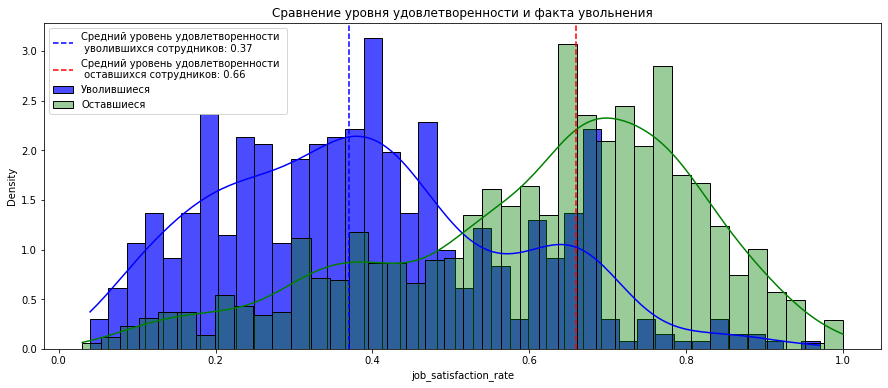

In [87]:
fig, axes = plt.subplots(figsize=(15, 6))

# График №1
sns.histplot(
    data=target_dependence_quit,
    x=target_dependence_quit['job_satisfaction_rate'],
    label='Уволившиеся',
    color='blue',
    alpha=0.7,
    bins=40, 
    stat='density', 
    common_norm=False,
    kde=True,
    ax=axes
)

# Медиана для графика №1
mean_quit = target_dependence_quit['job_satisfaction_rate'].median()
axes.axvline(
    mean_quit,
    color='blue',
    linestyle='--',
    label=f'Средний уровень удовлетворенности \n уволившихся сотрудников: {mean_quit:.2f}'
)

# График №2
sns.histplot(
    data=target_dependence_stay['job_satisfaction_rate'],
    label='Оставшиеся',
    color='green',
    alpha=0.4,
    bins=40, 
    stat='density', 
    common_norm=False,
    kde=True,
    ax=axes
)

# Медиана для графика №2
mean_stay = target_dependence_stay['job_satisfaction_rate'].median()
axes.axvline(
    mean_stay,
    color='red', linestyle='--',
    label=f'Средний уровень удовлетворенности \n оставшихся сотрудников: {mean_stay:.2f}'
)

axes.set_title('Сравнение уровня удовлетворенности и факта увольнения')
plt.legend(loc='upper left')
plt.show()

**Комментарии**

Дополнительно проверим **гипотезу**, что у оставшихся сотрудников уровень удовлетворённости работой выше, чем у уволившихся.  

*Н₀ (нулевая гипотеза)*: уровень удовлетворённости работой у уволившихся и оставшихся сотрудников одинаковый.

*Н₁ (альтернативная гипотеза)*: уровень удовлетворённости работой у оставшихся сотрудников выше.

In [88]:
# Проводим t-тест для проверки гипотезы

alpha = 0.05  # уровень статистической значимости


results = st.ttest_ind(target_dependence_stay['job_satisfaction_rate'], target_dependence_quit['job_satisfaction_rate'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: уровень удовлетворённости работой у уволившихся и оставшихся сотрудников одинаковый.')
else:
    print('Нет оснований отвергать нулевую гипотезу: нет статистически значимой разницы.') 
    

p-значение: 6.155610332585965e-105
Отвергаем нулевую гипотезу: уровень удовлетворённости работой у уволившихся и оставшихся сотрудников одинаковый.


**Комментарии**

Гистаграмма сравнения уровня удовлетворенности сотрудников показала, что среднего уровень удовлетворенности уволившихся сотрудников (0.37) практически в два раза ниже, чем у тех, кто остался в компании (0.66). 
Также статистический тест отверг гипотезу, что уровень удовлетворённости работой у уволившихся и оставшихся сотрудников одинаковый. P-значение, равное 6.155610332585965e-105, представляет собой очень маленькое число. Низкое p-значение указывает на то, что вероятность получения таких данных при условии, что нулевая гипотеза верна, крайне мала. Таким образом, уволившиеся сотрудники не могут быть более удовлетворенными работой, чем оставшиеся. 

**Вывод**

Исследовательский анализ данных об увольнении сотрудников показал, что по статистическим показателям и распределениям данные в тренировочной выборке целевого признака `quit` похожи на данные в тренировочной выборке целевого признака `job_satisfaction`. Анализируя матрицу корреляции Phi-K, можно сделать вывод, что наиболее выраженная связь между целевым признаком `quit` у входных признаков `employment_years` (0.66), `salary` (0.56). 

Составляя портрет "уволившегося сотрудника" можно сделать вывод, что в чаще всего из компании увольнялись сотрудники с позиций junior в первый год работы. Возможными причинами увольнений могли стать низкая заработная плата, отсутствие повышения и признания работы со стороны руководителя (оценка 3).

Также важно отметить, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Тестовые данные показали, что средний уровень удовлетворенности уволившихся сотрудников (0.37) практически в два раза ниже, чем у тех, кто остался в компании (0.66).

## Добавление нового входного признака

**Комментарии**

Допустим, job_satisfaction_rate и quit действительно связаны и мы получили необходимое значение метрики в первой задаче. Тогда добавим job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [89]:
# Добавляем job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи

train_quit_js =  best_model.predict(train_quit.drop(['quit'], axis = 1))
train_quit['job_satisfaction_rate'] = train_quit_js

# Проверим результат

display(train_quit.head(5))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.653333
814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.791667


In [90]:
# Добавляем job_satisfaction_rate к тестовым данным

test_quit_js =  best_model.predict(X_test_quit)
test_quit['job_satisfaction_rate'] = test_quit_js

# Проверим результат

display(test_quit.head(5))

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,no,0.855000
686555,hr,junior,medium,1,no,no,4,30000,no,0.676667
467458,sales,middle,low,5,no,no,4,19200,no,0.690000
418655,sales,middle,low,6,no,no,4,19200,no,0.713333
789145,hr,middle,medium,5,no,no,5,40800,no,0.816667


**Комментарии**

После добавления новых признаков повторно проведем анализ корреляции выборок, чтобы убедиться, что новый признак не создаёт мультиколлинеарности с уже существующими признаками.

In [91]:
# Создаём список с наименованиями количественных признаков
interval_cols_quit_new = [
    'salary',
    'job_satisfaction_rate',
]

# Рассчитываем матрицу корреляций phi-k

corr_matrix_train_quit_new = train_quit.phik_matrix(interval_cols=interval_cols_quit_new)
display(corr_matrix_train_quit_new)


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
dept,1.000000,0.000000,0.000000,0.000000,0.000000,0.044274,0.042772,0.280300,0.000000,0.215598
level,0.000000,1.000000,0.479480,0.692676,0.110585,0.000000,0.007189,0.745104,0.312799,0.262640
workload,0.000000,0.479480,1.000000,0.213013,0.044388,0.014063,0.000000,0.793876,0.132243,0.134409
employment_years,0.000000,0.692676,0.213013,1.000000,0.156494,0.000000,0.000000,0.491915,0.659093,0.416021
last_year_promo,0.000000,0.110585,0.044388,0.156494,1.000000,0.000000,0.032376,0.215043,0.157370,0.545481
last_year_violations,0.044274,0.000000,0.014063,0.000000,0.000000,1.000000,0.179228,0.086087,0.185071,0.634116
supervisor_evaluation,0.042772,0.007189,0.000000,0.000000,0.032376,0.179228,1.000000,0.055330,0.245489,0.783069
salary,0.280300,0.745104,0.793876,0.491915,0.215043,0.086087,0.055330,1.000000,0.564154,0.274566
quit,0.000000,0.312799,0.132243,0.659093,0.157370,0.185071,0.245489,0.564154,1.000000,0.517653
job_satisfaction_rate,0.215598,0.262640,0.134409,0.416021,0.545481,0.634116,0.783069,0.274566,0.517653,1.000000


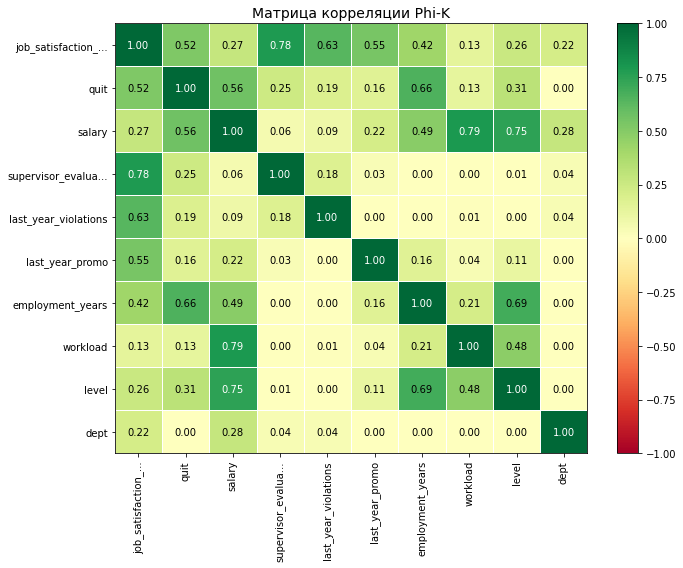

In [92]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_train_quit_new.values,
                        x_labels=corr_matrix_train_quit_new.columns,
                        y_labels=corr_matrix_train_quit_new.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

In [93]:
# Рассчитываем матрицу корреляций phi-k

corr_matrix_test_quit_new = test_quit.phik_matrix(interval_cols=interval_cols_quit_new)
display(corr_matrix_test_quit_new)

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
dept,1.000000,0.000000,0.030720,0.000000,0.000000,0.000000,0.058630,0.330057,0.000000,0.183826
level,0.000000,1.000000,0.474453,0.689747,0.118283,0.017551,0.000000,0.749068,0.293881,0.267993
workload,0.030720,0.474453,1.000000,0.202096,0.035565,0.000000,0.035920,0.785872,0.102236,0.148643
employment_years,0.000000,0.689747,0.202096,1.000000,0.173637,0.066371,0.000000,0.494701,0.605927,0.423162
last_year_promo,0.000000,0.118283,0.035565,0.173637,1.000000,0.000000,0.011704,0.193727,0.137762,0.512533
last_year_violations,0.000000,0.017551,0.000000,0.066371,0.000000,1.000000,0.189719,0.000000,0.174740,0.602940
supervisor_evaluation,0.058630,0.000000,0.035920,0.000000,0.011704,0.189719,1.000000,0.114588,0.294738,0.782884
salary,0.330057,0.749068,0.785872,0.494701,0.193727,0.000000,0.114588,1.000000,0.508308,0.308369
quit,0.000000,0.293881,0.102236,0.605927,0.137762,0.174740,0.294738,0.508308,1.000000,0.567769
job_satisfaction_rate,0.183826,0.267993,0.148643,0.423162,0.512533,0.602940,0.782884,0.308369,0.567769,1.000000


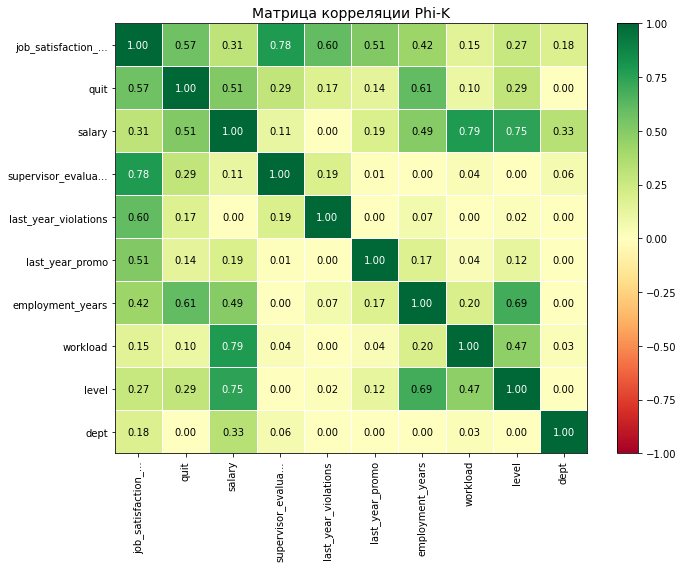

In [94]:
# Отображение корреляционной матрицы в виде тепловой карты
plot_correlation_matrix(corr_matrix_test_quit_new.values,
                        x_labels=corr_matrix_test_quit_new.columns,
                        y_labels=corr_matrix_test_quit_new.index,
                        title='Матрица корреляции Phi-K',
                        figsize=(10,8))
plt.show()

**Комментарии**

Анализируя матрицу корреляции Phi-K после добавления нового признака, можно сделать вывод, что наиболее выраженная связь между новым признаком `job_satisfaction_rate` у входных признаков `supervisor_evaluation` (0.78), `last_year_violations` (0.60), `quit` (0.57),  `last_year_promo` (0.51) и `employment_years` (0.42). Мультиколлинеарность добавление нового признака не вызвало.



## Подготовка данных в пайплайне

Для подготовки признаков будем использовать:
- MinMaxScaler/StandartScaler для стобцов `employment_years`, `salary`, `job_satisfaction_rate`
- OrdinalEncoder для столбцов `supervisor_evaluation`, `level`, `workload`
- OneHotEncoder для столбцов `dept`, `last_year_promo`, `last_year_violations`

In [95]:
# Проверим есть ли в подготовленных данных явные строки-дубликаты. 

print('Количество явных дубликатов в датафрейме train_quit:', train_quit.duplicated().sum())
display(train_quit.loc[train_quit.duplicated(keep=False)])
print('Количество явных дубликатов в датафрейме test_quit:', test_quit.duplicated().sum())
display(test_quit.loc[test_quit.duplicated(keep=False)])


Количество явных дубликатов в датафрейме train_quit: 1413


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.653333
814010,sales,junior,medium,2,no,no,4,27600,no,0.846364
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.337500
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.350000
996399,marketing,middle,low,7,no,no,4,25200,no,0.822000
...,...,...,...,...,...,...,...,...,...,...
632886,sales,junior,low,3,no,no,4,12000,no,0.638333
387733,marketing,middle,medium,5,no,no,3,44400,no,0.475455
588809,sales,junior,medium,4,no,no,3,26400,no,0.528571


Количество явных дубликатов в датафрейме test_quit: 507


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
686555,hr,junior,medium,1,no,no,4,30000,no,0.676667
467458,sales,middle,low,5,no,no,4,19200,no,0.690000
418655,sales,middle,low,6,no,no,4,19200,no,0.713333
500791,sales,middle,high,9,no,no,4,49200,no,0.670000
937235,sales,junior,medium,1,no,yes,3,26400,yes,0.185714
...,...,...,...,...,...,...,...,...,...,...
760964,sales,junior,medium,3,no,no,5,21600,no,0.653333
380255,sales,middle,medium,8,no,no,4,38400,no,0.788125
393147,marketing,junior,low,3,no,no,3,20400,yes,0.508571


In [97]:
# Загружаем данные для обучения

y_train_quit = train_quit['quit']
X_train_quit = train_quit.drop(['quit'], axis = 1)

In [98]:
# Загружаем данные для тестирования

y_test_quit = test_quit['quit']
X_test_quit = test_quit.drop(['quit'], axis = 1)

In [99]:
# Применение Label Encoder

label_encoder = LabelEncoder()
y_train_quit = label_encoder.fit_transform(y_train_quit)
y_test_quit = label_encoder.transform(y_test_quit)

# Проверим результат

print("Уникальные классы:", label_encoder.classes_)
print("Преобразованные метки:", y_train_quit)

Уникальные классы: ['no' 'yes']
Преобразованные метки: [0 0 0 ... 1 0 1]


In [100]:
# Определяем тип признаков для пайплайна

ohe_columns_quit = ['dept', 'last_year_promo',  'last_year_violations']
ord_columns_quit = ['level', 'workload']
num_columns_quit = ['employment_years', 'salary', 'job_satisfaction_rate', 'supervisor_evaluation']


In [101]:
# Создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование

ohe_pipe_quit = Pipeline([
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)),
    ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

In [102]:
# Создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование

ord_pipe_quit = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high'],
                    #[1, 2, 3, 4, 5]
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)


In [103]:
# Создаём общий пайплайн для подготовки данных

data_preprocessor_quit = ColumnTransformer(
    [('ohe', ohe_pipe_quit, ohe_columns_quit),
     ('ord', ord_pipe_quit, ord_columns_quit),
     ('num', MinMaxScaler(), num_columns_quit)
    ], 
    remainder='passthrough'
)

In [104]:
# Cоздаём итоговый пайплайн: подготовка данных и модель

pipe_final_quit = Pipeline([
    ('preprocessor', data_preprocessor_quit),
    ('models', LogisticRegression(random_state=RANDOM_STATE))
])


**Вывод**

В настоящем разделе были написаны пайплайны для подготовки признаков для обучения модели.

## Обучение и анализ моделей

### Подбор гиперпараметров и кросс-валидация

In [105]:
# Создаем сетку гиперпараметров для моделей

param_grid_quit = [
    # Словарь для модели KNeighborsClassifier()

    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(3, 21),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    # Словарь для модели DecisionTreeClassifier()

    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(5, 10),
        'models__min_samples_leaf': range(2, 6),
        'models__min_samples_split': range(2, 6),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # Словарь для модели LogisticRegression()

    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            #class_weight='balanced', 
            solver='liblinear', 
            penalty='l1')],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

In [106]:
%%time
# Обучим модель

randomized_search = RandomizedSearchCV(
    pipe_final_quit, 
    param_grid_quit, 
    n_iter=100,
    cv=15,
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1,
    error_score='raise'
)
randomized_search.fit(X_train_quit, y_train_quit)


print('Лучшая модель:\n\n', randomized_search.best_estimator_)
print('Параметры лучшей модели:', randomized_search.best_params_)
print ('ROC-AUC лучшей модели на кросс-валидации:', randomized_search.best_score_)

Лучшая модель:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                           

**Комментарии**

Достигнув метрики ROC-AUC в 0.92 на кросс-валидации по обучающей выборке, лучше всех себя показала модель  KNeighborsClassifier(n_neighbors=16). Теперь, проверим её качество на тестовой выборке.

### Проверка модели на тестовых данных 

In [107]:
# Проверим работу модели на тестовой выборке

best_model_quit = randomized_search.best_estimator_
y_test_proba_quit = best_model_quit.predict_proba(X_test_quit)[:, 1]

print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_quit, y_test_proba_quit)}')

Метрика ROC-AUC на тестовой выборке: 0.9162388381832908


**Комментарии**

Метрика ROC-AUC на тестовой выборке составила 0.91, что является критерием успеха. 

In [108]:
# Проверим модель с помощью DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train_quit, y_train_quit)

y_pred_dummy = dummy_classifier.predict(X_test_quit)
y_proba_dummy = dummy_classifier.predict_proba(X_test_quit)[:, 1]
y_test_pred_quit = best_model_quit.predict(X_test_quit)
y_test_proba_quit = best_model_quit.predict_proba(X_test_quit)[:, 1]

print("Метрика Accuracy лучшей модели:", accuracy_score(y_test_quit, y_test_pred_quit))
print("Метрика Accuracy Dummy classifier:", accuracy_score(y_test_quit, y_pred_dummy))
print("Метрика ROC-AUC на тестовой выборке:", roc_auc_score(y_test_quit, y_test_proba_quit))
print("Метрика ROC-AUC Dummy classifier:", roc_auc_score(y_test_quit, y_proba_dummy))

Метрика Accuracy лучшей модели: 0.892
Метрика Accuracy Dummy classifier: 0.718
Метрика ROC-AUC на тестовой выборке: 0.9162388381832908
Метрика ROC-AUC Dummy classifier: 0.5


**Комментарии**

Метрика ROC-AUC DummyClassifier на тестовой выборке - 0.5, что соответствует качеству случайно модели. Метрика Accuracy DummyClassifier ниже, чем у лучшей модели. Значит наша модель хорошо справляется с поставленной ей задачей.

**Вывод**

Для поиска лучшей модели для предсказания вероятности увольнения сотрудников был использован инструмент `RandomizedSearchCV`, который анализировал различные параметры для трех моделей `KNeighborsClassifier()`, `DecisionTreeClassifier()` и `LogisticRegression()`.  

Достигнув метрики ROC-AUC в  0.92 на кросс-валидации и 0.91 на тестовых данных, лучше всех себя показала модель KNeighborsClassifier(n_neighbors=16). Алгоритм KNN эффективен для задач классификации, когда отношения между признаками и целевой переменной нелинейны. Он делает предсказания на основе сходства наблюдений, сравнивая их с ближайшими соседями в пространстве признаков. Эта модель не сильно подвержена переобучению, а большое количество соседей сглаживает влияние шума в данных, позволяя строить более устойчивую модель.

# Общий вывод

Для настоящего проекта нам были предоставлены данные компании HR-аналитики «Работа с заботой», которая помогает бизнесу оптимизировать управление персоналом.

**Цель исследования**: Разработать техническое решение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.
- *Задача 1.* Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика. 
- *Задача 2.* Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

В **первых разделах** каждой из задач проекта мы изучили общую информацию о данных. Нам для анализа были предоставлено шесть датасетов, которые включали данные со следующими признаками:
- `id` — уникальный идентификатор сотрудника;
- `dept` — отдел, в котором работает сотрудник;
- `level` — уровень занимаемой должности;
- `workload` — уровень загруженности сотрудника;
- `employment_years` — длительность работы в компании (в годах);
- `last_year_promo` — показывает, было ли повышение за последний год;
- `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
- `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
- `salary` — ежемесячная зарплата сотрудника;
- `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак (от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён).
- `quit` - данные уволился ли сотрудник или нет.

Во **вторых разделах** каждой из задач проекта мы провели основную предобработку данных в датафреймах, которая включала в себя преобразование опечаток в столбцах, где это необходимо, обработку дубликатов и пропусков.

В **третьих разделах** каждой из задач проекта мы провели исследовательский анализ данных и сделали следующие выводы:
- Медианная зарплата в компании - 30 000. 
- Обнаружен дисбаланс классов признака `employment_years`. В компании практически в 2 раза больше сотрудников, которые работают в ней до 3х лет: опытных сотрудников гораздо меньше. 
- Самая частая оценка, которую давал руководитель - 4, затем идет 3.
- Большая часть сотрудников (38%) работают в отделе продаж. Представитель технического отдела (21.6%) на втором места, за ним примерно в равных пропорциях следуют отделы закупок, маркетинга и HR (11-15%).
- Почти 90% всех сотрудников занимают должности уровня junior (47.5%) и middle (43.6%), опытных специалистов senior всего (9%).
- Половина сотрудников имеют средний уровень загруженности, 30% - низкий, и 18.4% - высокий. 
- Только 3% сотрудников получили повышение за последний год. 
- Большая часть сотрудников (86%) не имеют нарушений трудового договора за последний год.
- Наиболее выраженная связь между целевым признаком `job_satisfaction` у входных признаков `supervisor_evaluation` (0.76), `last_year_violations` (0.56).
- Наиболее выраженная связь между целевым признаком `quit` у входных признаков `employment_years` (0.66), `salary` (0.56). 
- Составляя портрет "уволившегося сотрудника" можно сделать вывод, что в чаще всего из компании увольнялись сотрудники с позиций junior в первый год работы. Возможными причинами увольнений могли стать низкая заработная плата, отсутствие повышения и признания работы со стороны руководителя (оценка 3).
- Также важно отметить, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Тестовые данные показали, что средний уровень удовлетворенности уволившихся сотрудников (0.37) практически в два раза ниже, чем у тех, кто остался в компании (0.66). Статистический тест отверг гипотезу, что уровень удовлетворённости работой у уволившихся и оставшихся сотрудников одинаковый. P-значение равно 6.155610332585965e-105.

В **четвертом и пятом разделах** каждой из задач проекта мы добавили значение `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи. Затем мы разработали пайплайны для подготовки данных и выбора оптимальной модели для предсказания уровня удовлетворенности сотрудника и вероятности его увольнения.

В **заключительных разделах** каждой из задач проекта мы использовали инструменты `GridSearchCV` и `RandomizedSearchCV` для поиска лучших моделей. Для предсказания уровня удовлетворенности сотрудников были проанализированы различные параметры моделей `DecisionTreeRegressor()` и `LinearRegression()`. Для предсказания вероятности увольнения сотрудников были проанализированы различные параметры моделей `KNeighborsClassifier()`, `DecisionTreeClassifier()` и `LogisticRegression()`. Также мы создали собственную метрику - SMAPE (симметричное среднее абсолютное процентное отклонение). 

В первой задаче, достигнув метрики SMAPE в 14.97 на кросс-валидации и 13.57 на тестовых данных, лучше всех себя показала модель DecisionTreeRegressor(max_depth=14, min_samples_leaf=3, random_state=42). 

Во второй задаче, достигнув метрики ROC-AUC в 0.92 на кросс-валидации и 0.91 на тестовых данных, лучше всех себя показала модель KNeighborsClassifier(n_neighbors=16). 

Таким образом, по итогам проведенного анализа и разработки моделей машинного обучения появится возможность предсказать уровень удовлетворённости сотрудника и вероятность его увольнения из компании, что снизит потенциальные риски. Это важно для бизнеса, так как удовлетворённость работой напрямую влияет на отток сотрудников. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Исходя из анализа данных можно дать следующие рекомендации для бизнеса:
- Так как больше всего уволилось сотрудников из отделов sales и technology, следует провести дополнительные опросы сотрудников данных отделов и узнать с какими проблемами они сталкиваются.
- Требуется дополнительная поддержка и адаптация новых и неопытных сотрудников (уровня junior и стажа работы от 1 до 3х лет) - это практически 90% уволившихся.
- Оценка работы сотрудника руководителем играет важную роль, необходимо провести обучение линейных руководителей по особенностям оценки и взаимодействия с сотрудниками, возможно им не хватает эмпатии.
- Почти у 100% уволившихся не было повышения за последний год - стоит подумать о возможностях карьерного роста сотрудников.
- Средняя заработная плата неуволившегося сотрудника почти в половину больше уволившегося, необходимо выяснить с чем это связано, и более прозрачно обозначить критерии оплаты труда.
- Есть зависимость между увольнением и удовлетворённостью сотрудника, используя подготовленные модели, можно предсказывать удовлетворённость сотрудников, и, при необходимости, проводить дополнительные меры с целью её увеличения (обучение, соц.гарантии, корпоративные мероприятия и прочее).

